+# Analiza Datelor din Recensământul Populației

## Introducere

Acest notebook prezintă o analiză detaliată a datelor demografice din Republica Moldova. Setul de date conține informații despre:

- **Etnie** (`ethnic_nm`) - apartenența etnică declarată
- **Vârstă** (`age_h`) - vârsta în ani
- **Sex** (`sex`) - masculin/feminin
- **Mediu de rezidență** (`urb`) - urban/rural
- **Regiunea** (`cod_reg`) - Nord, Centru, Sud, Mun. Chișinău, UTAG
- **Nivel de educație** (`level_education_n`) - de la fără școală până la doctorat
- **Limba vorbită** (`language_spoken_nm`) - limba de comunicare obișnuită
- **Alte limbi** (`other_language1_nm`, `other_language2_nm`, `other_language3_nm`) - limbi adiționale cunoscute
- **Limba maternă** (`mother_tongue_nm`) - prima limbă învățată
- **Stare civilă** (`legal_marital_status`) - niciodată căsătorit, căsătorit, văduv, divorțat

### Obiectivele analizei:
1. Încărcarea și înțelegerea structurii datelor
2. Curățarea și preprocesarea datelor
3. Analiza exploratorie (EDA)
4. Vizualizări comprehensive
5. Interpretări și concluzii

## 1. Importarea Bibliotecilor

Vom folosi următoarele biblioteci:
- **pandas**: pentru manipularea și analiza datelor tabulare
- **numpy**: pentru operații numerice
- **matplotlib**: pentru vizualizări de bază
- **seaborn**: pentru vizualizări statistice avansate

In [71]:
# =============================================================================
# IMPORTAREA BIBLIOTECILOR
# =============================================================================
# În Python, pentru a folosi funcționalități avansate, trebuie să importăm
# biblioteci (pachete de cod scrise de alți programatori).
# Sintaxa generală: import biblioteca as alias
# Aliasul ne permite să scriem mai puțin cod (ex: pd în loc de pandas)

# -----------------------------------------------------------------------------
# PANDAS - Biblioteca principală pentru analiza datelor
# -----------------------------------------------------------------------------
# pandas este cea mai populară bibliotecă pentru lucrul cu date tabulare (tabele)
# Ne oferă structura de date DataFrame - similar cu un tabel Excel
# Convenția este să importăm pandas cu aliasul "pd"
import pandas as pd

# -----------------------------------------------------------------------------
# NUMPY - Biblioteca pentru calcule numerice
# -----------------------------------------------------------------------------
# numpy oferă suport pentru operații matematice pe array-uri (vectori, matrici)
# Multe funcții pandas se bazează pe numpy în spate
# Convenția este să importăm numpy cu aliasul "np"
import numpy as np

# -----------------------------------------------------------------------------
# MATPLOTLIB - Biblioteca de bază pentru vizualizări
# -----------------------------------------------------------------------------
# matplotlib.pyplot conține funcții pentru crearea graficelor
# Este biblioteca fundamentală de vizualizare în Python
# Convenția este să importăm pyplot cu aliasul "plt"
import matplotlib.pyplot as plt

# -----------------------------------------------------------------------------
# SEABORN - Biblioteca pentru vizualizări statistice avansate
# -----------------------------------------------------------------------------
# seaborn este construită peste matplotlib și oferă:
# - Grafice mai estetice cu mai puțin cod
# - Vizualizări statistice specializate (heatmaps, violin plots, etc.)
# Convenția este să importăm seaborn cu aliasul "sns"
import seaborn as sns

# =============================================================================
# CONFIGURAREA OPȚIUNILOR DE AFIȘARE PANDAS
# =============================================================================
# pd.set_option() modifică comportamentul implicit al pandas

# display.max_columns: Câte coloane să afișeze când printăm un DataFrame
# None = afișează TOATE coloanele (fără limită)
pd.set_option('display.max_columns', None)

# display.max_rows: Limita de rânduri afișate
# 100 = dacă DataFrame-ul are peste 100 rânduri, va fi trunchiat
pd.set_option('display.max_rows', 100)

# display.width: Lățimea totală a output-ului în caractere
# None = ajustare automată la lățimea ecranului
pd.set_option('display.width', None)

# =============================================================================
# CONFIGURAREA STILURILOR PENTRU VIZUALIZĂRI
# =============================================================================

# plt.style.use() selectează un stil predefinit pentru grafice
# 'seaborn-v0_8-whitegrid' oferă:
# - Fundal alb cu linii de grid subtile
# - Aspect profesional și curat
# - Ușor de citit pe ecran și la tipărire
plt.style.use('seaborn-v0_8-whitegrid')

# sns.set_palette() definește paleta de culori pentru grafice
# 'husl' este o paletă cu culori distincte și echilibrate
# Ideală când avem multe categorii de afișat
sns.set_palette('husl')

# plt.rcParams este un dicționar cu toate setările matplotlib
# Modificăm dimensiunile fonturilor pentru lizibilitate:
plt.rcParams['font.size'] = 12          # Font general
plt.rcParams['axes.titlesize'] = 14     # Font pentru titluri grafice
plt.rcParams['axes.labelsize'] = 12     # Font pentru etichete axe

# =============================================================================
# SUPRIMAREA WARNING-URILOR
# =============================================================================
# Biblioteca warnings controlează afișarea mesajelor de avertizare
import warnings
# filterwarnings('ignore') ascunde toate warning-urile
# ATENȚIE: În producție, e mai bine să le afișăm pentru a detecta probleme
# Le ignorăm aici doar pentru a avea un output mai curat în notebook
warnings.filterwarnings('ignore')

# Confirmăm că totul s-a încărcat corect
print("Biblioteci importate cu succes!")

Biblioteci importate cu succes!


## 2. Încărcarea Datelor

### 2.1 Încărcarea clasificatoarelor (lookup tables)

Clasificatoarele sunt tabele de referință care mapează coduri numerice la etichete descriptive.
Acestea vor fi folosite pentru a transforma datele codificate în text ușor de interpretat.

#### Funcția `pd.read_csv()` - Parametri importanți:
- **`filepath_or_buffer`**: calea către fișierul CSV
- **`sep`**: separatorul de coloane (implicit virgulă, aici folosim `;`)
- **`encoding`**: codificarea caracterelor (implicit 'utf-8')

In [72]:
# =============================================================================
# ÎNCĂRCAREA CLASIFICATOARELOR (LOOKUP TABLES / TABELE DE REFERINȚĂ)
# =============================================================================
# 
# CE SUNT CLASIFICATOARELE?
# -------------------------
# Clasificatoarele sunt tabele mici care mapează coduri numerice la descrieri text.
# Exemplu: în datele principale, regiunea poate fi stocată ca numărul 1, 2, 3...
# Clasificatorul ne spune că 1 = "Nord", 2 = "Centru", etc.
# 
# DE CE FOLOSIM CODURI NUMERICE?
# ------------------------------
# - Economie de spațiu: "1" ocupă mai puțină memorie decât "Moldovenească"
# - Viteză de procesare: calculatorul compară numere mai rapid decât texte
# - Consistență: evităm erori de scriere ("Moldoveneasca" vs "Moldovenească")
# 
# La final, vom folosi clasificatoarele pentru a transforma codurile în text
# pentru ca rezultatele să fie ușor de citit și înțeles.

# -----------------------------------------------------------------------------
# DEFINIREA CĂII CĂTRE DATE
# -----------------------------------------------------------------------------
# Variabila data_path stochează calea relativă către folderul cu fișierele CSV
# 'data/' înseamnă: în folderul curent, există un subfolder numit "data"
data_path = 'data/'

# -----------------------------------------------------------------------------
# CITIREA FIȘIERELOR CSV CU pd.read_csv()
# -----------------------------------------------------------------------------
# 
# SINTAXA: pd.read_csv(filepath, sep=',', encoding='utf-8', ...)
# 
# PARAMETRI FOLOSIȚI:
# - filepath (primul argument): calea către fișier
#   - Putem concatena string-uri cu +: data_path + 'filename.csv'
# 
# - sep=';' : separatorul de coloane
#   - CSV = Comma-Separated Values, dar în Europa se folosește adesea ';'
#   - De ce? Pentru că în Europa virgula este separator decimal (1,5 vs 1.5)
#   - Dacă nu specificăm sep, pandas presupune virgulă (',')
# 
# REZULTAT: Fiecare pd.read_csv() returnează un DataFrame (tabel pandas)

# Clasificator pentru REGIUNI
# Conține maparea: cod_reg (1,2,3,4,5) -> lab (Nord, Centru, Sud, ...)
cl_regiune = pd.read_csv(data_path + 'cl.cod_reg.csv', sep=';')

# Clasificator pentru ETNII
# Conține maparea: ethnic_nm (1,2,3,...) -> lab (Moldovenească, Română, ...)
cl_etnie = pd.read_csv(data_path + 'cl.ethnic_nm.csv', sep=';')

# Clasificator pentru LIMBI
# Conține lista tuturor limbilor posibile cu codurile lor
cl_limba = pd.read_csv(data_path + 'cl.lang.csv', sep=';')

# Clasificator pentru STAREA CIVILĂ
# Conține: legal_marital_status (1,2,3,4) -> lab (niciodata, casatorit, vaduv, divortat)
cl_stare_civila = pd.read_csv(data_path + 'cl.legal_marital_status.csv', sep=';')

# Clasificator pentru NIVELUL DE EDUCAȚIE
# Conține nivelurile educaționale ordonate (de la fără școală până la doctorat)
cl_educatie = pd.read_csv(data_path + 'cl.level_education_n.csv', sep=';')

# Clasificator pentru SEX
# Conține: sex (1,2) -> lab (M, F)
cl_sex = pd.read_csv(data_path + 'cl.sex.csv', sep=';')

# Clasificator pentru MEDIUL DE REZIDENȚĂ (urban/rural)
# Conține: urb (0,1) -> lab (rural, urban)
cl_urban = pd.read_csv(data_path + 'cl.urb.csv', sep=';')

# Confirmăm încărcarea reușită
print("Clasificatoare încărcate cu succes!")

Clasificatoare încărcate cu succes!


### 2.2 Vizualizarea Clasificatoarelor

Să examinăm conținutul fiecărui clasificator pentru a înțelege corespundențele cod-etichetă.

In [73]:
# =============================================================================
# VIZUALIZAREA CONȚINUTULUI CLASIFICATOARELOR
# =============================================================================
# 
# Înainte de a lucra cu datele, este important să înțelegem ce valori posibile
# există în fiecare clasificator. Acest pas ne ajută să:
# - Verificăm că datele s-au încărcat corect
# - Înțelegem semnificația fiecărui cod numeric
# - Planificăm analiza (ce categorii avem disponibile?)
#
# METODA .to_string()
# -------------------
# DataFrame.to_string(index=False) convertește DataFrame-ul în text pentru afișare
# - index=False: nu afișează numerele de rând (0, 1, 2...) din stânga
# - Util pentru o afișare curată, mai ales pentru tabele mici

# Separator vizual pentru o ieșire organizată
# "="*60 creează un string de 60 de caractere "="
print("="*60)
print("CLASIFICATOR REGIUNI")
print("="*60)
# Afișăm întregul clasificator de regiuni
print(cl_regiune.to_string(index=False))

# "\n" inserează o linie nouă (goală) pentru spațiere
print("\n" + "="*60)
print("CLASIFICATOR ETNII")
print("="*60)
# Afișăm clasificatorul de etnii - vedem toate categoriile posibile
print(cl_etnie.to_string(index=False))

print("\n" + "="*60)
print("CLASIFICATOR SEX")
print("="*60)
# Doar 2 valori: 1=M (masculin), 2=F (feminin)
print(cl_sex.to_string(index=False))

print("\n" + "="*60)
print("CLASIFICATOR MEDIU (URBAN/RURAL)")
print("="*60)
# Doar 2 valori: 0=rural, 1=urban
print(cl_urban.to_string(index=False))

print("\n" + "="*60)
print("CLASIFICATOR STARE CIVILĂ")
print("="*60)
# 4 stări posibile ale căsătoriei
print(cl_stare_civila.to_string(index=False))

print("\n" + "="*60)
print("CLASIFICATOR NIVEL EDUCAȚIE")
print("="*60)
# 11 niveluri de educație, de la "fără școală" la "doctorat"
# Observăm că sunt ordonate de la cel mai scăzut la cel mai ridicat
print(cl_educatie.to_string(index=False))

CLASIFICATOR REGIUNI
 cod_reg           lab
       1          Nord
       2        Centru
       3           Sud
       4 Mun. Chisinau
       5          UTAG

CLASIFICATOR ETNII
 ethnic_nm                 lab
         1       Moldovenească
         2              Română
         3          Ucraineană
         4                Rusă
         5             Găgăuză
         6             Bulgară
         7 Țigănească / Romani
         8                Alta
         9      Nu au declarat

CLASIFICATOR SEX
 sex lab
   1   M
   2   F

CLASIFICATOR MEDIU (URBAN/RURAL)
 urb   lab
   0 rural
   1 urban

CLASIFICATOR STARE CIVILĂ
 legal_marital_status       lab
                    1 niciodata
                    2 casatorit
                    3     vaduv
                    4  divortat

CLASIFICATOR NIVEL EDUCAȚIE
 level_education_n                                                                                                                                       lab
                 1        

In [74]:
# =============================================================================
# VIZUALIZAREA CLASIFICATORULUI DE LIMBI (PARȚIAL)
# =============================================================================
# 
# Clasificatorul de limbi este mai mare (122 de limbi!), așa că afișăm
# doar primele 30 pentru a nu încărca output-ul.
#
# METODA .head(n)
# ---------------
# DataFrame.head(n) returnează primele n rânduri din DataFrame
# - Foarte utilă pentru a "arunca o privire" peste date fără a afișa totul
# - Implicit (fără argument) returnează 5 rânduri
# - head(30) returnează primele 30 de rânduri

print("="*60)
print("CLASIFICATOR LIMBI (primele 30)")
print("="*60)

# cl_limba.head(30) = ia primele 30 rânduri
# .to_string(index=False) = convertește în text fără index
print(cl_limba.head(30).to_string(index=False))

# F-string pentru afișare dinamică
# len(cl_limba) returnează numărul total de rânduri din DataFrame
# {len(cl_limba) - 30} calculează câte limbi nu am afișat
print(f"\n... și încă {len(cl_limba) - 30} limbi")

CLASIFICATOR LIMBI (primele 30)
 lang                 lab
    1       Moldovenească
    2              Română
    3          Ucraineană
    4                Rusă
    5             Găgăuză
    6             Bulgară
    7 Țigănească / Romani
    8            Belorusă
    9             Germană
   10            Poloneză
   11                Cehă
   12             Armeană
   13               Azeră
   14               Turcă
   15               Arabă
   16     Ivrit (Ebraică)
   17                Idiș
   18              Tătară
   19 Gruzină / Georgiană
   20             Engleză
   21            Italiană
   22            Franceză
   23            Spaniolă
   24          Portugheză
   25              Greacă
   26             Abazină
   27              Abhază
   28               Adîgă
   29      Afgană / Puștu
   30               Agulă

... și încă 92 limbi


### 2.3 Încărcarea Setului Principal de Date

Setul principal conține aproximativ 232.000 de înregistrări - un eșantion reprezentativ al populației.

In [75]:
# =============================================================================
# ÎNCĂRCAREA SETULUI PRINCIPAL DE DATE
# =============================================================================
# 
# Acesta este setul de date pe care îl vom analiza - un eșantion din 
# recensământul populației. Fiecare rând reprezintă o persoană, iar 
# coloanele conțin informații demografice despre acea persoană.
#
# DIFERENȚA FAȚĂ DE CLASIFICATOARE:
# - Clasificatoarele: tabele mici de referință (5-122 rânduri)
# - Setul principal: date reale cu ~232,000 de înregistrări

# Citim fișierul CSV cu datele principale
# Același lucru ca la clasificatoare: sep=';' pentru separatorul de coloane
df = pd.read_csv(data_path + 'smpl_py.csv', sep=';')

# =============================================================================
# AFIȘAREA INFORMAȚIILOR DE BAZĂ
# =============================================================================
# 
# len(df) returnează numărul de rânduri din DataFrame
# len(df.columns) returnează numărul de coloane
#
# F-STRING CU FORMATARE:
# - f"..." permite inserarea de variabile Python în string
# - {len(df):,} : virgula (:,) adaugă separator de mii (232,309 în loc de 232309)
# - Formatul :, este specific locale-ului englezesc; face numerele mai ușor de citit

print(f"Setul de date conține {len(df):,} înregistrări și {len(df.columns)} coloane.")

# =============================================================================
# CALCULAREA MEMORIEI UTILIZATE
# =============================================================================
# 
# df.memory_usage(deep=True) returnează memoria ocupată de fiecare coloană
# - deep=True: calculează memoria reală (inclusiv pentru string-uri)
# - .sum(): însumează memoria tuturor coloanelor
# 
# Convertim din bytes în megabytes (MB):
# - 1 KB = 1024 bytes
# - 1 MB = 1024 KB = 1024 * 1024 bytes = 1024**2 bytes
#
# {valoare:.2f} formatează numărul cu 2 zecimale

print(f"\nMemorie utilizată: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Setul de date conține 232,309 înregistrări și 13 coloane.

Memorie utilizată: 23.04 MB


## 3. Prima Privire asupra Datelor

### 3.1 Structura datelor

Funcția `df.head(n)` afișează primele `n` rânduri (implicit 5).
Funcția `df.info()` oferă informații despre:
- Numărul de înregistrări (entries)
- Tipul de date al fiecărei coloane
- Numărul de valori non-null
- Memoria utilizată

In [76]:
# =============================================================================
# VIZUALIZAREA PRIMELOR RÂNDURI - METODA head()
# =============================================================================
# 
# Când încărcăm un set mare de date, primul lucru pe care îl facem este să 
# "aruncăm o privire" peste primele rânduri pentru a vedea structura datelor.
#
# METODA DataFrame.head(n)
# ------------------------
# - Returnează primele n rânduri din DataFrame
# - Implicit (fără argument): n=5
# - Aici folosim head(10) pentru a vedea 10 exemple
#
# CE OBSERVĂM ÎN OUTPUT:
# - Fiecare rând are un index (0, 1, 2...) în stânga
# - Coloanele conțin coduri numerice (ex: ethnic_nm=1, sex=1, urb=1)
# - Unele celule conțin NaN (Not a Number) = valori lipsă
# - NaN apare de obicei pentru copii mici (nu au educație încă) sau 
#   pentru persoane care nu au răspuns la întrebare
#
# OBSERVAȚIE IMPORTANTĂ:
# La acest moment, datele sunt greu de interpretat (ce înseamnă ethnic_nm=1?)
# De aceea vom folosi clasificatoarele pentru a transforma codurile în text.

# Afișăm primele 10 rânduri
# În Jupyter, ultima expresie dintr-o celulă este afișată automat
df.head(10)

,ethnic_nm,age_h,sex,urb,cod_reg,level_education_n,language_spoken_nm,other_language1_nm,other_language2_nm,other_language3_nm,mother_tongue_nm,isosi,legal_marital_status
0,1,39,1,1,4,9.0,1.0,20.0,NaN,NaN,4,1,2
1,1,59,2,1,4,8.0,1.0,6.0,NaN,NaN,1,1,1
2,1,35,2,1,4,6.0,2.0,4.0,20.0,NaN,2,1,2
3,1,1,1,1,4,NaN,NaN,NaN,NaN,NaN,2,3,1
4,1,33,1,1,4,9.0,2.0,20.0,9.0,4.0,2,3,2
5,1,67,2,1,4,7.0,2.0,4.0,NaN,NaN,2,3,1
6,1,80,1,1,4,8.0,1.0,4.0,22.0,NaN,1,3,4
7,1,32,2,1,4,7.0,2.0,20.0,NaN,NaN,4,1,2
8,1,74,2,1,4,7.0,1.0,4.0,NaN,NaN,1,3,4
9,1,51,1,1,4,6.0,4.0,1.0,NaN,NaN,4,1,1


In [77]:
# =============================================================================
# INFORMAȚII DETALIATE DESPRE STRUCTURA DATELOR - METODA info()
# =============================================================================
# 
# df.info() este una dintre cele mai importante metode pentru înțelegerea datelor.
# Oferă un "raport de sănătate" al DataFrame-ului.
#
# CE INFORMAȚII PRIMIM:
# ---------------------
# 1. Tipul obiectului (DataFrame)
# 2. RangeIndex: intervalul de indexuri (de la 0 la n-1)
# 3. Numărul total de coloane
# 4. Pentru FIECARE coloană:
#    - Numele coloanei
#    - Câte valori NON-NULL are (importante pentru detectarea valorilor lipsă!)
#    - Tipul de date (Dtype)
#
# TIPURI DE DATE (Dtype) COMUNE:
# - int64: numere întregi pe 64 de biți (ex: 1, 2, 3, 42, -10)
# - float64: numere cu virgulă pe 64 de biți (ex: 3.14, -0.5, NaN)
#   NOTĂ: Coloanele cu NaN devin float64 chiar dacă conțin numere întregi!
# - object: text/string sau tipuri mixte
# - datetime64: date și ore
# - bool: True/False
#
# CUM IDENTIFICĂM VALORILE LIPSĂ:
# - Comparăm "Non-Null Count" cu "entries" (total rânduri)
# - Exemplu: dacă avem 232,309 entries și o coloană are 203,941 non-null,
#   înseamnă că are 232,309 - 203,941 = 28,368 valori lipsă

print("Informații despre setul de date:")
print("="*60)

# Apelăm metoda info() care afișează direct în consolă
# Nu trebuie să folosim print() pentru că info() face asta automat
df.info()

Informații despre setul de date:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232309 entries, 0 to 232308
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ethnic_nm             232309 non-null  int64  
 1   age_h                 232309 non-null  int64  
 2   sex                   232309 non-null  int64  
 3   urb                   232309 non-null  int64  
 4   cod_reg               232309 non-null  int64  
 5   level_education_n     203941 non-null  float64
 6   language_spoken_nm    225035 non-null  float64
 7   other_language1_nm    144850 non-null  float64
 8   other_language2_nm    40982 non-null   float64
 9   other_language3_nm    7838 non-null    float64
 10  mother_tongue_nm      232309 non-null  int64  
 11  isosi                 232309 non-null  int64  
 12  legal_marital_status  232309 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 23.0 MB


### Interpretare:

Din output-ul `df.info()` observăm:

1. **Tipuri de date**: Toate coloanele sunt de tip `float64`, ceea ce indică valori numerice cu potențiale valori lipsă (NaN)
2. **Valori lipsă**: Coloanele `level_education_n`, `other_language2_nm`, `other_language3_nm` au mai puține valori non-null
3. **Coloane categorice codificate**: Valorile sunt coduri numerice care trebuie mapate la etichete text

### 3.2 Statistici Descriptive

Funcția `df.describe()` calculează:
- **count**: numărul de valori non-null
- **mean**: media aritmetică
- **std**: deviația standard (măsură a dispersiei)
- **min**: valoarea minimă
- **25%**: primul quartil (Q1)
- **50%**: mediana (Q2)
- **75%**: al treilea quartil (Q3)
- **max**: valoarea maximă

In [78]:
# =============================================================================
# STATISTICI DESCRIPTIVE - METODA describe()
# =============================================================================
# 
# df.describe() calculează automat statistici pentru toate coloanele numerice.
# Este echivalentul funcțiilor statistice din Excel aplicate pe fiecare coloană.
#
# CE STATISTICI CALCULEAZĂ:
# -------------------------
# count  = Numărul de valori NON-NULL (utile pentru a vedea valorile lipsă)
# mean   = Media aritmetică (suma valorilor / numărul de valori)
# std    = Deviația standard (măsură a dispersiei/variabilității datelor)
#          - std mic = valorile sunt apropiate de medie
#          - std mare = valorile sunt împrăștiate
# min    = Valoarea minimă
# 25%    = Primul quartil (Q1) - 25% din valori sunt sub această valoare
# 50%    = Mediana (Q2) - jumătate din valori sunt sub/peste această valoare
#          IMPORTANT: Mediana ≠ Media! Mediana este mai robustă la outliers.
# 75%    = Al treilea quartil (Q3) - 75% din valori sunt sub această valoare
# max    = Valoarea maximă
#
# QUARTILELE NE AJUTĂ SĂ ÎNȚELEGEM DISTRIBUȚIA:
# - IQR (Interquartile Range) = Q3 - Q1 = unde se află "mijlocul" datelor
# - Diferența dintre medie și mediană indică asimetria distribuției
#
# .round(2) rotunjește toate valorile la 2 zecimale pentru lizibilitate

# Calculăm și afișăm statisticile descriptive
# Rezultatul este tot un DataFrame, deci Jupyter îl va afișa ca tabel
df.describe().round(2)

,ethnic_nm,age_h,sex,urb,cod_reg,level_education_n,language_spoken_nm,other_language1_nm,other_language2_nm,other_language3_nm,mother_tongue_nm,isosi,legal_marital_status
count,232309.00,232309.00,232309.00,232309.00,232309.00,203941.00,225035.00,144850.00,40982.0,7838.00,232309.00,232309.00,232309.00
mean,1.60,40.58,1.53,0.44,2.55,5.71,2.12,5.81,13.6,15.65,2.12,2.32,1.88
std,1.34,23.00,0.50,0.50,1.26,1.98,3.76,5.90,9.8,11.52,4.35,0.93,0.88
min,1.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00
25%,1.00,20.00,1.00,0.00,1.00,4.00,1.00,4.00,4.0,4.00,1.00,1.00,1.00
50%,1.00,41.00,2.00,0.00,2.00,6.00,2.00,4.00,20.0,20.00,2.00,3.00,2.00
75%,1.00,60.00,2.00,1.00,4.00,7.00,2.00,4.00,20.0,22.00,2.00,3.00,2.00
max,9.00,123.00,2.00,1.00,5.00,11.00,122.00,119.00,119.0,119.00,122.00,3.00,4.00


### Interpretare Statistici Descriptive:

**Vârstă (`age_h`):**
- Media: ~38 ani
- Interval: 0-100+ ani
- Mediana (50%): ~38 ani - distribuție relativ simetrică

**Sex (`sex`):**
- Valori: 1 (Masculin) și 2 (Feminin)
- Media ~1.53 sugerează un procent ușor mai mare de femei

**Mediu (`urb`):**
- Valori: 0 (rural) și 1 (urban)
- Media ~0.42 indică că aproximativ 42% locuiesc în mediul urban

## 4. Analiza Valorilor Lipsă

Valorile lipsă (NaN - Not a Number) sunt comune în datele reale și trebuie gestionate corespunzător.

### Metode folosite:
- `df.isnull()`: returnează un DataFrame boolean (True = valoare lipsă)
- `df.isnull().sum()`: numără valorile lipsă per coloană

In [79]:
# =============================================================================
# ANALIZA VALORILOR LIPSĂ (MISSING VALUES)
# =============================================================================
# 
# CE SUNT VALORILE LIPSĂ?
# -----------------------
# În pandas, valorile lipsă sunt reprezentate ca NaN (Not a Number).
# Ele apar când:
# - Respondentul nu a răspuns la o întrebare
# - Întrebarea nu se aplica (ex: copii nu au nivel de educație)
# - Erori în colectarea datelor
#
# DE CE CONTEAZĂ?
# ---------------
# - Multe funcții pandas ignoră automat valorile NaN
# - Prea multe valori lipsă pot afecta calitatea analizei
# - Trebuie să decidem cum le tratăm: le ignorăm, le ștergem, sau le înlocuim?
#
# METODE FOLOSITE:
# ----------------
# df.isnull() - Returnează un DataFrame de True/False (True = valoare lipsă)
# df.isnull().sum() - Numără valorile True (adică NaN) pe fiecare coloană

# -----------------------------------------------------------------------------
# PASUL 1: Creăm un DataFrame cu statistici despre valorile lipsă
# -----------------------------------------------------------------------------
# pd.DataFrame({...}) creează un DataFrame nou din dicționar
# Fiecare cheie devine numele unei coloane, valorile devin datele coloanei

missing_data = pd.DataFrame({
    # df.isnull() returnează True pentru NaN, False pentru valori existente
    # .sum() adună toate True-urile (în Python: True=1, False=0)
    'Valori Lipsă': df.isnull().sum(),
    
    # Calculăm procentul: (nr_lipsa / total) * 100
    # len(df) = numărul total de rânduri
    # .round(2) = rotunjim la 2 zecimale
    'Procent (%)': (df.isnull().sum() / len(df) * 100).round(2)
})

# -----------------------------------------------------------------------------
# PASUL 2: Sortăm rezultatele pentru o vizualizare mai clară
# -----------------------------------------------------------------------------
# .sort_values('coloana', ascending=False) sortează DataFrame-ul
# - ascending=False = ordine descrescătoare (cele mai multe lipsă sus)
# - ascending=True (implicit) = ordine crescătoare

missing_data = missing_data.sort_values('Procent (%)', ascending=False)

# Afișăm rezultatele
print("Analiza valorilor lipsă:")
print("="*60)
print(missing_data)

Analiza valorilor lipsă:
                      Valori Lipsă  Procent (%)
other_language3_nm          224471        96.63
other_language2_nm          191327        82.36
other_language1_nm           87459        37.65
level_education_n            28368        12.21
language_spoken_nm            7274         3.13
cod_reg                          0         0.00
urb                              0         0.00
sex                              0         0.00
age_h                            0         0.00
ethnic_nm                        0         0.00
mother_tongue_nm                 0         0.00
isosi                            0         0.00
legal_marital_status             0         0.00


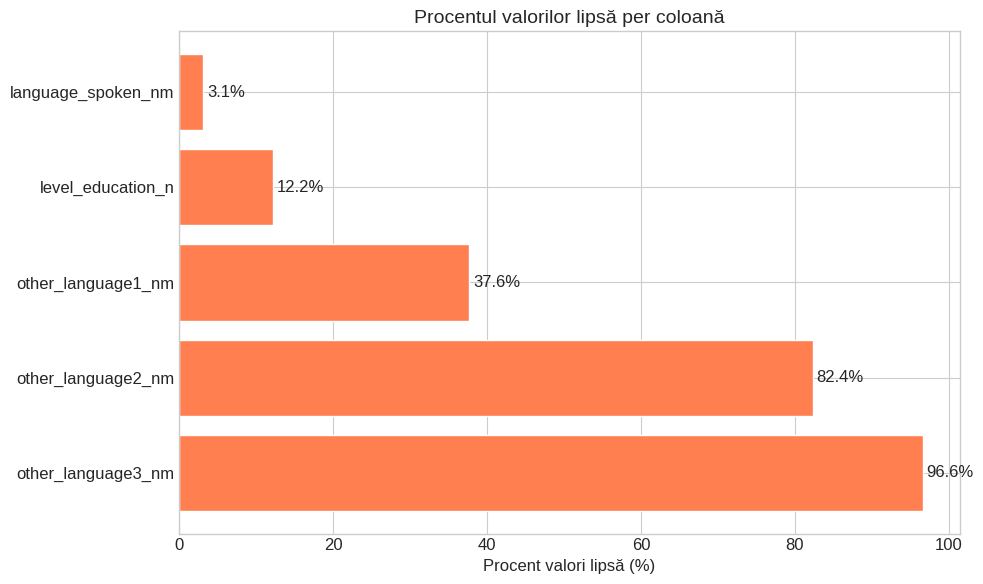

In [80]:
# =============================================================================
# VIZUALIZAREA VALORILOR LIPSĂ - GRAFIC CU BARE ORIZONTALE
# =============================================================================
# 
# Un grafic este mult mai ușor de interpretat decât un tabel de numere!
# Vizualizarea ne permite să identificăm rapid tiparele din date.
#
# STRUCTURA CODULUI PENTRU GRAFICE MATPLOTLIB:
# --------------------------------------------
# 1. Creăm figura și axele cu plt.subplots()
# 2. Desenăm pe axe (ax.barh(), ax.plot(), etc.)
# 3. Configurăm aspectul (titluri, etichete, etc.)
# 4. Afișăm cu plt.show()

# -----------------------------------------------------------------------------
# PASUL 1: Crearea figurii
# -----------------------------------------------------------------------------
# plt.subplots() creează o figură (container) și axe (zona de desenat)
# figsize=(lățime, înălțime) specifică dimensiunea în inch
# Returnează 2 obiecte: fig (figura) și ax (axele)
fig, ax = plt.subplots(figsize=(10, 6))

# -----------------------------------------------------------------------------
# PASUL 2: Pregătirea datelor pentru grafic
# -----------------------------------------------------------------------------
# Selectăm doar coloanele care AU valori lipsă (Procent > 0)
# Acest lucru face graficul mai relevant - nu afișăm bare de 0%
# 
# FILTRAREA ÎN PANDAS:
# missing_data[condiție] returnează doar rândurile unde condiția este True
missing_cols = missing_data[missing_data['Procent (%)'] > 0]

# -----------------------------------------------------------------------------
# PASUL 3: Desenarea graficului cu bare orizontale
# -----------------------------------------------------------------------------
# ax.barh() = bar horizontal (bare orizontale)
# Argumente:
# - missing_cols.index = etichetele (numele coloanelor)
# - missing_cols['Procent (%)'] = valorile (lungimea barelor)
# - color='coral' = culoarea barelor (poți folosi și coduri hex: '#FF6F61')
bars = ax.barh(missing_cols.index, missing_cols['Procent (%)'], color='coral')

# -----------------------------------------------------------------------------
# PASUL 4: Configurarea axelor și titlului
# -----------------------------------------------------------------------------
# ax.set_xlabel() = eticheta axei X (orizontale)
# ax.set_title() = titlul graficului
ax.set_xlabel('Procent valori lipsă (%)')
ax.set_title('Procentul valorilor lipsă per coloană')

# -----------------------------------------------------------------------------
# PASUL 5: Adăugarea valorilor pe bare (opțional, dar util)
# -----------------------------------------------------------------------------
# zip() combină două liste element cu element
# Pentru fiecare bară, adăugăm textul cu valoarea
for bar, val in zip(bars, missing_cols['Procent (%)']):
    # ax.text(x, y, text, ...) adaugă text la coordonatele specificate
    # bar.get_width() = lățimea (lungimea) barei
    # bar.get_y() = poziția Y a barei
    # bar.get_height() = înălțimea barei
    # va='center' = aliniere verticală la centru
    ax.text(bar.get_width() + 0.5,                    # Poziția X (puțin după bară)
            bar.get_y() + bar.get_height()/2,         # Poziția Y (centrul barei)
            f'{val:.1f}%',                            # Textul (valoarea cu 1 zecimală)
            va='center')                              # Aliniere verticală

# -----------------------------------------------------------------------------
# PASUL 6: Finalizare și afișare
# -----------------------------------------------------------------------------
# plt.tight_layout() ajustează automat spațierea pentru a evita suprapunerile
plt.tight_layout()
# plt.show() afișează graficul
plt.show()

### Interpretare Valori Lipsă:

1. **`other_language3_nm`** (~91% lipsă): Foarte puțini respondenți cunosc 3 limbi adiționale - acest lucru este normal
2. **`other_language2_nm`** (~67% lipsă): Aproximativ o treime cunosc cel puțin 2 limbi adiționale
3. **`other_language1_nm`** (~34% lipsă): Două treimi au declarat cel puțin o limbă adițională
4. **`level_education_n`** (~14% lipsă): Probabil copii foarte mici care nu au intrat încă în sistemul educațional

**Concluzie**: Valorile lipsă sunt logice și explicabile prin natura datelor.

## 5. Pregătirea Datelor (Data Preparation)

### 5.1 Crearea dicționarelor de mapare

Vom transforma codurile numerice în etichete descriptive folosind metoda `map()`.

Un dicționar Python are forma `{cheie: valoare}` și permite mapări rapide.

In [81]:
# =============================================================================
# CREAREA DICȚIONARELOR DE MAPARE DIN CLASIFICATOARE
# =============================================================================
# 
# SCOPUL ACESTUI PAS:
# -------------------
# Vrem să transformăm codurile numerice (1, 2, 3...) în etichete text
# ("Moldovenească", "Română", etc.) pentru ca datele să fie ușor de citit.
#
# CE ESTE UN DICȚIONAR PYTHON?
# ----------------------------
# Un dicționar este o structură de date care stochează perechi cheie:valoare
# Sintaxa: {cheie1: valoare1, cheie2: valoare2, ...}
# Exemplu: {1: 'Nord', 2: 'Centru', 3: 'Sud'}
# 
# Când accesăm dicționar[cheie], obținem valoarea asociată.
# Exemplu: map_regiune[1] returnează 'Nord'
#
# FUNCȚIILE zip() și dict()
# -------------------------
# zip(lista1, lista2) - combină două liste element cu element
#     zip([1,2,3], ['a','b','c']) -> [(1,'a'), (2,'b'), (3,'c')]
# 
# dict(lista_de_perechi) - convertește lista de perechi în dicționar
#     dict([(1,'a'), (2,'b')]) -> {1: 'a', 2: 'b'}
#
# COMBINAȚIA dict(zip(...)) este foarte frecventă în pandas!

# -----------------------------------------------------------------------------
# MAPARE REGIUNI
# -----------------------------------------------------------------------------
# cl_regiune['cod_reg'] = coloana cu codurile (1, 2, 3, 4, 5)
# cl_regiune['lab'] = coloana cu etichetele ('Nord', 'Centru', ...)
# dict(zip(...)) creează {1: 'Nord', 2: 'Centru', ...}
map_regiune = dict(zip(cl_regiune['cod_reg'], cl_regiune['lab']))
print("Mapare Regiuni:", map_regiune)

# -----------------------------------------------------------------------------
# MAPARE ETNII
# -----------------------------------------------------------------------------
# Similar: ethnic_nm (cod) -> lab (etichetă)
map_etnie = dict(zip(cl_etnie['ethnic_nm'], cl_etnie['lab']))
print("\nMapare Etnii:", map_etnie)

# -----------------------------------------------------------------------------
# MAPARE SEX
# -----------------------------------------------------------------------------
# sex (1, 2) -> lab ('M', 'F')
map_sex = dict(zip(cl_sex['sex'], cl_sex['lab']))
print("\nMapare Sex:", map_sex)

# -----------------------------------------------------------------------------
# MAPARE URBAN/RURAL
# -----------------------------------------------------------------------------
# urb (0, 1) -> lab ('rural', 'urban')
# Observație: 0 = rural (nu urban), 1 = urban
map_urban = dict(zip(cl_urban['urb'], cl_urban['lab']))
print("\nMapare Urban/Rural:", map_urban)

# -----------------------------------------------------------------------------
# MAPARE STARE CIVILĂ
# -----------------------------------------------------------------------------
# legal_marital_status (1, 2, 3, 4) -> lab (niciodata, casatorit, vaduv, divortat)
map_stare_civila = dict(zip(cl_stare_civila['legal_marital_status'], cl_stare_civila['lab']))
print("\nMapare Stare Civilă:", map_stare_civila)

# -----------------------------------------------------------------------------
# MAPARE EDUCAȚIE
# -----------------------------------------------------------------------------
# level_education_n (1-11) -> lab (descrierile nivelurilor de educație)
map_educatie = dict(zip(cl_educatie['level_education_n'], cl_educatie['lab']))
print("\nMapare Educație:", map_educatie)

# -----------------------------------------------------------------------------
# MAPARE LIMBI
# -----------------------------------------------------------------------------
# lang (1-122) -> lab (numele limbilor)
# Nu afișăm pentru că dicționarul ar fi foarte lung!
map_limba = dict(zip(cl_limba['lang'], cl_limba['lab']))

Mapare Regiuni: {1: 'Nord', 2: 'Centru', 3: 'Sud', 4: 'Mun. Chisinau', 5: 'UTAG'}

Mapare Etnii: {1: 'Moldovenească', 2: 'Română', 3: 'Ucraineană', 4: 'Rusă', 5: 'Găgăuză', 6: 'Bulgară', 7: 'Țigănească / Romani', 8: 'Alta', 9: 'Nu au declarat'}

Mapare Sex: {1: 'M', 2: 'F'}

Mapare Urban/Rural: {0: 'rural', 1: 'urban'}

Mapare Stare Civilă: {1: 'niciodata', 2: 'casatorit', 3: 'vaduv', 4: 'divortat'}

Mapare Educație: {1: 'fără școală absolvită', 2: 'educație preșcolară', 3: 'primar', 4: 'gimnazial (mediu incomplet)', 5: 'liceal (10-12 clase)/mediu general (10-11 clase)', 6: 'profesional tehnic secundar (școală profesională/meserii, «PTU»)', 7: 'profesional tehnic postsecundar (colegiu, «tehnicum», școală în domeniul medical, farmaceutic, pedagogic și arte finalizate până în 1995)', 8: 'superior universitar finalizat până în 2008', 9: ' superior (ciclul I)/licență', 10: ' superior(ciclul II)/masterat', 11: 'superior(ciclul III)/doctorat, postdoctorat'}


### 5.2 Aplicarea mapărilor

Metoda `Series.map(dict)` înlocuiește valorile conform dicționarului furnizat.

**Parametri:**
- `arg`: dicționar, Series sau funcție pentru mapare
- `na_action`: dacă este 'ignore', valorile NaN nu sunt procesate

In [82]:
# =============================================================================
# APLICAREA MAPĂRILOR PE SETUL DE DATE
# =============================================================================
# 
# Acum vom folosi dicționarele create pentru a transforma codurile în text.
# Acest proces se numește "mapping" sau "encoding/decoding".
#
# METODA Series.map()
# -------------------
# Sintaxa: df['coloana'].map(dicționar)
# 
# Ce face:
# - Pentru fiecare valoare din coloană, caută acea valoare în dicționar
# - Înlocuiește valoarea cu cea găsită în dicționar
# - Dacă valoarea NU există în dicționar, rezultatul este NaN
#
# Exemplu:
# - Avem: df['cod_reg'] = [1, 2, 1, 4, 3]
# - Dicționar: {1: 'Nord', 2: 'Centru', 3: 'Sud', 4: 'Mun. Chisinau', 5: 'UTAG'}
# - Rezultat: ['Nord', 'Centru', 'Nord', 'Mun. Chisinau', 'Sud']
#
# DE CE FOLOSIM .copy()?
# ----------------------
# df.copy() creează o copie independentă a DataFrame-ului
# Modificările pe copie NU afectează originalul
# Aceasta este o bună practică: păstrăm datele originale intacte pentru referință

# -----------------------------------------------------------------------------
# PASUL 1: Creăm o copie a DataFrame-ului original
# -----------------------------------------------------------------------------
# Aceasta va fi versiunea "curățată" cu etichete text în loc de coduri
df_clean = df.copy()

# -----------------------------------------------------------------------------
# PASUL 2: Aplicăm mapările pentru fiecare coloană
# -----------------------------------------------------------------------------
# Pentru fiecare coloană cu coduri, creăm o coloană nouă cu textul corespunzător
# Sintaxa: df_clean['coloana_noua'] = df_clean['coloana_veche'].map(dicționar)

# Transformăm codul regiunii în numele regiunii
df_clean['regiune'] = df_clean['cod_reg'].map(map_regiune)

# Transformăm codul etniei în denumirea etniei
df_clean['etnie'] = df_clean['ethnic_nm'].map(map_etnie)

# Transformăm codul sexului (1/2) în M/F
df_clean['gen'] = df_clean['sex'].map(map_sex)

# Transformăm codul urban/rural (0/1) în 'rural'/'urban'
df_clean['mediu'] = df_clean['urb'].map(map_urban)

# Transformăm codul stării civile în text
df_clean['stare_civila'] = df_clean['legal_marital_status'].map(map_stare_civila)

# Transformăm codul educației în descrierea completă
df_clean['educatie'] = df_clean['level_education_n'].map(map_educatie)

# Transformăm codurile de limbă în nume de limbi
df_clean['limba_vorbita'] = df_clean['language_spoken_nm'].map(map_limba)
df_clean['limba_materna'] = df_clean['mother_tongue_nm'].map(map_limba)

# -----------------------------------------------------------------------------
# PASUL 3: Verificăm ce coloane noi am adăugat
# -----------------------------------------------------------------------------
# List comprehension: [expresie for element in lista if condiție]
# Filtrăm coloanele care NU existau în DataFrame-ul original
print("Mapări aplicate cu succes!")
print(f"\nNoile coloane: {[col for col in df_clean.columns if col not in df.columns]}")

Mapări aplicate cu succes!

Noile coloane: ['regiune', 'etnie', 'gen', 'mediu', 'stare_civila', 'educatie', 'limba_vorbita', 'limba_materna']


In [83]:
# =============================================================================
# VIZUALIZAREA DATELOR TRANSFORMATE
# =============================================================================
# 
# Acum că am aplicat mapările, să vedem cum arată datele cu etichete text.
# Comparați acest output cu cel de la df.head(10) - acum este mult mai ușor
# de înțeles ce reprezintă fiecare rând!
#
# SELECTAREA COLOANELOR SPECIFICE
# -------------------------------
# df[['col1', 'col2', 'col3']] selectează doar coloanele specificate
# Lista trebuie să fie între paranteze duble: [[...]]
# - Parantezele exterioare: accesare/indexare
# - Parantezele interioare: definirea listei de coloane

# -----------------------------------------------------------------------------
# DEFINIM COLOANELE PE CARE VREM SĂ LE AFIȘĂM
# -----------------------------------------------------------------------------
# Alegem coloanele cu etichete text pentru a demonstra efectul transformării
# Excludem coloanele cu coduri numerice și pe cele cu date incomplete
cols_to_show = ['age_h',           # Vârsta (în ani) - singura coloană numerică
                'gen',             # Sex: M sau F
                'mediu',           # Urban sau Rural
                'regiune',         # Numele regiunii
                'etnie',           # Apartenența etnică
                'educatie',        # Nivelul de educație
                'limba_vorbita',   # Limba de comunicare
                'limba_materna',   # Prima limbă învățată
                'stare_civila']    # Starea civilă

# -----------------------------------------------------------------------------
# AFIȘĂM PRIMELE 15 RÂNDURI CU COLOANELE SELECTATE
# -----------------------------------------------------------------------------
# df_clean[cols_to_show] = selectează doar coloanele din listă
# .head(15) = ia primele 15 rânduri
# În Jupyter, ultima expresie este afișată automat ca tabel
df_clean[cols_to_show].head(15)

,age_h,gen,mediu,regiune,etnie,educatie,limba_vorbita,limba_materna,stare_civila
0,39,M,urban,Mun. Chisinau,Moldovenească,superior (ciclul I)/licență,Moldovenească,Rusă,casatorit
1,59,F,urban,Mun. Chisinau,Moldovenească,superior universitar finalizat până în 2008,Moldovenească,Moldovenească,niciodata
2,35,F,urban,Mun. Chisinau,Moldovenească,profesional tehnic secundar (școală profesiona...,Română,Română,casatorit
3,1,M,urban,Mun. Chisinau,Moldovenească,NaN,NaN,Română,niciodata
4,33,M,urban,Mun. Chisinau,Moldovenească,superior (ciclul I)/licență,Română,Română,casatorit
5,67,F,urban,Mun. Chisinau,Moldovenească,"profesional tehnic postsecundar (colegiu, «teh...",Română,Română,niciodata
6,80,M,urban,Mun. Chisinau,Moldovenească,superior universitar finalizat până în 2008,Moldovenească,Moldovenească,divortat
7,32,F,urban,Mun. Chisinau,Moldovenească,"profesional tehnic postsecundar (colegiu, «teh...",Română,Rusă,casatorit
8,74,F,urban,Mun. Chisinau,Moldovenească,"profesional tehnic postsecundar (colegiu, «teh...",Moldovenească,Moldovenească,divortat
9,51,M,urban,Mun. Chisinau,Moldovenească,profesional tehnic secundar (școală profesiona...,Rusă,Rusă,niciodata


### 5.3 Crearea grupelor de vârstă

Pentru o analiză mai ușoară, vom grupa vârstele în categorii.

Funcția `pd.cut()` împarte datele în intervale (bins):
- **`x`**: seria de date de împărțit
- **`bins`**: lista de limite ale intervalelor
- **`labels`**: etichetele pentru fiecare interval
- **`right`**: dacă True, intervalele sunt închise la dreapta (ex: (0, 18])

In [84]:
# =============================================================================
# CREAREA GRUPELOR DE VÂRSTĂ CU pd.cut()
# =============================================================================
# 
# DE CE GRUPĂM VÂRSTELE?
# ----------------------
# Vârsta exactă (0, 1, 2, ... 100) are prea multe valori distincte pentru analiză.
# Gruparea în categorii (ex: "tineri", "adulți", "vârstnici") face analiza:
# - Mai ușor de vizualizat
# - Mai ușor de interpretat
# - Mai utilă pentru decizii de politici publice
#
# FUNCȚIA pd.cut() - "TAIE" DATELE ÎN INTERVALE
# ---------------------------------------------
# Sintaxa: pd.cut(x, bins, labels, right)
#
# Parametri:
# - x: seria de date de împărțit (în cazul nostru: vârstele)
# - bins: lista de limite ale intervalelor
#   Exemplu: [0, 18, 65, 150] creează intervalele: (0,18], (18,65], (65,150]
# - labels: etichetele pentru fiecare interval (trebuie să fie cu 1 mai puține decât bins)
# - right=True (implicit): intervalele includ limita din dreapta
#   (0, 18] = de la 0 (exclusiv) la 18 (inclusiv) = vârstele 1-18
#
# NOTAȚIE MATEMATICĂ PENTRU INTERVALE:
# - (a, b] = mai mare decât a ȘI mai mic sau egal cu b
# - [a, b) = mai mare sau egal cu a ȘI mai mic decât b

# -----------------------------------------------------------------------------
# PASUL 1: Definim limitele intervalelor (bins)
# -----------------------------------------------------------------------------
# Alegem limite care au sens din perspectivă demografică și socială
bins = [0,      # Limita inferioară (vârsta minimă = 0)
        6,      # 0-6 ani: preșcolari
        14,     # 7-14 ani: școlari (primar + gimnaziu)
        18,     # 15-18 ani: adolescenți (liceu)
        30,     # 19-30 ani: tineri (studii, începutul carierei)
        45,     # 31-45 ani: adulți tineri (familie, carieră)
        60,     # 46-60 ani: adulți (vârful carierei)
        75,     # 61-75 ani: vârstnici (pensie recentă)
        150]    # 75+ ani: longevivi (limita superioară mare pentru a include toți)

# -----------------------------------------------------------------------------
# PASUL 2: Definim etichetele pentru fiecare interval
# -----------------------------------------------------------------------------
# IMPORTANT: Numărul de etichete = Numărul de bins - 1
# (8 limite creează 7 intervale)
labels = ['0-6 (preșcolari)',        # Interval: (0, 6]
          '7-14 (școlari)',          # Interval: (6, 14]
          '15-18 (adolescenți)',     # Interval: (14, 18]
          '19-30 (tineri)',          # Interval: (18, 30]
          '31-45 (adulți tineri)',   # Interval: (30, 45]
          '46-60 (adulți)',          # Interval: (45, 60]
          '61-75 (vârstnici)',       # Interval: (60, 75]
          '75+ (longevivi)']         # Interval: (75, 150]

# -----------------------------------------------------------------------------
# PASUL 3: Aplicăm pd.cut() pentru a crea noua coloană
# -----------------------------------------------------------------------------
# Rezultatul este o nouă coloană de tip "Categorical" (categorie)
df_clean['grupa_varsta'] = pd.cut(df_clean['age_h'],  # Coloana cu vârstele
                                   bins=bins,          # Limitele intervalelor
                                   labels=labels,      # Etichetele
                                   right=True)         # Intervalele includ limita dreaptă

# -----------------------------------------------------------------------------
# PASUL 4: Verificăm distribuția pe grupe de vârstă
# -----------------------------------------------------------------------------
# .value_counts() numără câte persoane sunt în fiecare grupă
# .sort_index() sortează după etichete (în ordine crescătoare a vârstei)
print("Distribuția pe grupe de vârstă:")
print("="*50)
print(df_clean['grupa_varsta'].value_counts().sort_index())

Distribuția pe grupe de vârstă:
grupa_varsta
0-6 (preșcolari)         16592
7-14 (școlari)           24596
15-18 (adolescenți)      10908
19-30 (tineri)           25812
31-45 (adulți tineri)    49299
46-60 (adulți)           45544
61-75 (vârstnici)        47509
75+ (longevivi)           9854
Name: count, dtype: int64


## 6. Analiza Exploratorie (EDA)

### 6.1 Distribuția pe Regiuni

In [85]:
# =============================================================================
# ANALIZA DISTRIBUȚIEI POPULAȚIEI PE REGIUNI
# =============================================================================
# 
# Aceasta este prima noastră analiză EDA (Exploratory Data Analysis).
# Vom afla câți oameni locuiesc în fiecare regiune și ce procent reprezintă.
#
# METODA value_counts()
# ---------------------
# Series.value_counts() este una dintre cele mai folosite metode în pandas!
# 
# Ce face:
# - Numără de câte ori apare fiecare valoare unică în coloană
# - Returnează o Series sortată descrescător (cele mai frecvente valori primele)
#
# Parametri utili:
# - normalize=True: returnează proporții (procente) în loc de numere absolute
# - sort=True (implicit): sortează descrescător
# - ascending=True: sortează crescător

# -----------------------------------------------------------------------------
# PASUL 1: Numărăm persoanele din fiecare regiune
# -----------------------------------------------------------------------------
# df_clean['regiune'].value_counts() returnează:
# Centru           66950
# Mun. Chisinau    63542
# Nord             60746
# ... etc
regiune_counts = df_clean['regiune'].value_counts()

# -----------------------------------------------------------------------------
# PASUL 2: Calculăm procentele
# -----------------------------------------------------------------------------
# Formula: procent = (nr_persoane / total_persoane) * 100
# len(df_clean) = numărul total de rânduri (persoane)
# .round(2) = rotunjim la 2 zecimale
regiune_pct = (regiune_counts / len(df_clean) * 100).round(2)

# -----------------------------------------------------------------------------
# PASUL 3: Combinăm rezultatele într-un DataFrame pentru afișare frumoasă
# -----------------------------------------------------------------------------
# Creăm un DataFrame cu două coloane: numere absolute și procente
regiune_stats = pd.DataFrame({
    'Număr': regiune_counts,        # Prima coloană: numerele absolute
    'Procent (%)': regiune_pct      # A doua coloană: procentele
})

# Afișăm rezultatele
print("Distribuția populației pe regiuni:")
print("="*50)
print(regiune_stats)

Distribuția populației pe regiuni:
               Număr  Procent (%)
regiune                          
Centru         66950        28.82
Mun. Chisinau  63542        27.35
Nord           60746        26.15
Sud            30564        13.16
UTAG           10507         4.52


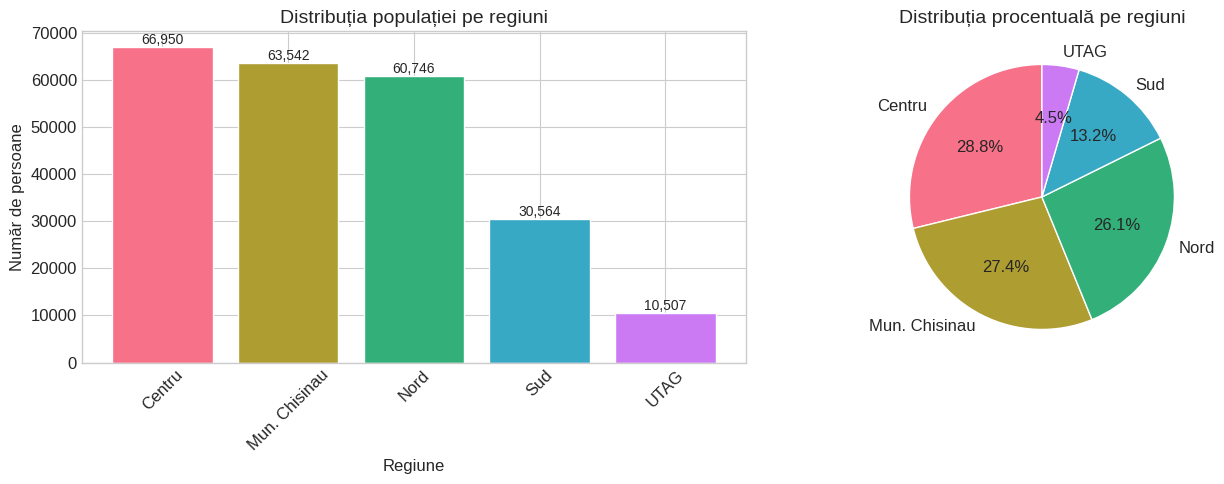

In [86]:
# =============================================================================
# VIZUALIZAREA DISTRIBUȚIEI PE REGIUNI - GRAFIC BARE + GRAFIC PIE
# =============================================================================
# 
# Vom crea două grafice alăturate:
# 1. Grafic cu bare (bar chart) - arată numerele absolute
# 2. Grafic pie (plăcintă) - arată proporțiile
#
# Fiecare tip de grafic are avantaje:
# - Bare: mai ușor de comparat valori exacte
# - Pie: mai bun pentru a vedea "partea din întreg"
#
# plt.subplots() CU MAI MULTE GRAFICE
# -----------------------------------
# plt.subplots(nrows, ncols, figsize) creează o grilă de grafice
# - nrows: numărul de rânduri de grafice
# - ncols: numărul de coloane de grafice
# - figsize: dimensiunea întregii figuri (lățime, înălțime) în inch
# 
# Returnează:
# - fig: obiectul Figure (container-ul principal)
# - axes: array de obiecte Axes (zonele de desenat)
#   - Pentru 1 rând: axes[0], axes[1], ...
#   - Pentru mai multe rânduri: axes[rând, coloană]

# -----------------------------------------------------------------------------
# PASUL 1: Creăm figura cu 2 grafice pe un rând
# -----------------------------------------------------------------------------
# 1 rând × 2 coloane = 2 grafice alăturate orizontal
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# -----------------------------------------------------------------------------
# PASUL 2: Pregătim culorile
# -----------------------------------------------------------------------------
# sns.color_palette('husl', n) generează n culori distincte
# 'husl' este o paletă cu culori echidistante pe cercul cromatic
colors = sns.color_palette('husl', len(regiune_counts))

# -----------------------------------------------------------------------------
# PASUL 3: Primul grafic - bare verticale
# -----------------------------------------------------------------------------
# axes[0] = primul grafic (index 0)
# ax.bar(x, height, color) desenează bare verticale
# - x: pozițiile pe axa X (etichetele)
# - height: înălțimile barelor (valorile)
# - color: culorile barelor
bars = axes[0].bar(regiune_counts.index,    # Numele regiunilor
                    regiune_counts.values,   # Numărul de persoane
                    color=colors)            # Culorile

# Configurăm etichetele și titlul
axes[0].set_xlabel('Regiune')                           # Eticheta axei X
axes[0].set_ylabel('Număr de persoane')                 # Eticheta axei Y
axes[0].set_title('Distribuția populației pe regiuni')  # Titlul graficului
axes[0].tick_params(axis='x', rotation=45)              # Rotim etichetele la 45°

# Adăugăm valorile deasupra barelor pentru claritate
for bar in bars:
    height = bar.get_height()  # Înălțimea barei = valoarea
    # ax.text(x, y, text, ha, va) adaugă text la coordonatele specificate
    # ha='center' = aliniere orizontală la centru
    # va='bottom' = textul începe de jos (deasupra punctului)
    axes[0].text(bar.get_x() + bar.get_width()/2.,  # Centrul barei pe X
                 height,                             # Deasupra barei pe Y
                 f'{int(height):,}',                 # Textul (număr cu separatori mii)
                 ha='center', va='bottom', fontsize=10)

# -----------------------------------------------------------------------------
# PASUL 4: Al doilea grafic - pie (plăcintă)
# -----------------------------------------------------------------------------
# axes[1] = al doilea grafic (index 1)
# ax.pie() desenează un grafic circular
# Parametri:
# - values: valorile (mărimea feliilor)
# - labels: etichetele pentru fiecare felie
# - autopct='%1.1f%%': afișează automat procentele (1 zecimală)
# - colors: culorile feliilor
# - startangle: unghiul de start (90° = începe de sus)
axes[1].pie(regiune_counts.values,              # Valorile
            labels=regiune_counts.index,        # Etichetele
            autopct='%1.1f%%',                  # Format procent
            colors=colors,                      # Culorile
            startangle=90)                      # Începe de la ora 12
axes[1].set_title('Distribuția procentuală pe regiuni')

# -----------------------------------------------------------------------------
# PASUL 5: Finalizare și afișare
# -----------------------------------------------------------------------------
# tight_layout() ajustează automat spațierea între grafice
plt.tight_layout()
plt.show()

### Interpretare - Distribuția pe Regiuni:

- **Mun. Chișinău** reprezintă cea mai mare pondere (~25%), fiind capitala și principalul centru urban
- **Regiunea Sud** și **Nord** au ponderi similare
- **UTAG** (Unitatea Teritorială Autonomă Găgăuzia) are cea mai mică pondere, corespunzând dimensiunii sale geografice

Această distribuție reflectă structura administrativ-teritorială reală a Republicii Moldova.

### 6.2 Distribuția pe Gen

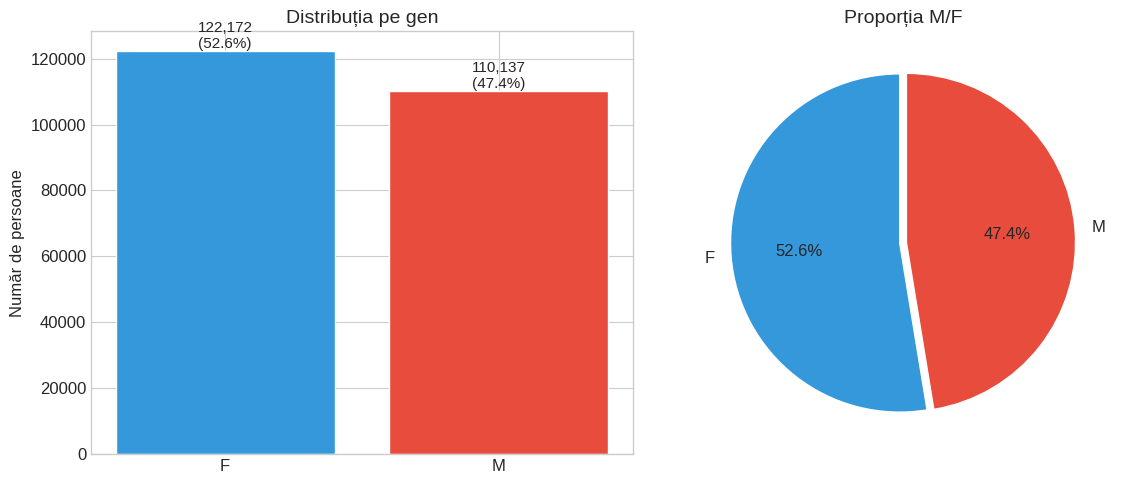


Raportul de masculinitate: 90.1 bărbați la 100 femei


In [87]:
# =============================================================================
# ANALIZA DISTRIBUȚIEI PE GEN (SEX)
# =============================================================================
# 
# Vom analiza raportul dintre bărbați și femei în populație.
# Acest indicator demografic este important pentru:
# - Politici de sănătate publică
# - Planificare urbană
# - Studii sociale
#
# RAPORTUL DE MASCULINITATE
# -------------------------
# Este un indicator demografic standard: câți bărbați la 100 de femei
# Formula: (număr_bărbați / număr_femei) × 100
# - > 100: mai mulți bărbați decât femei
# - < 100: mai multe femei decât bărbați
# - = 100: echilibru perfect

# -----------------------------------------------------------------------------
# PASUL 1: Numărăm persoanele pe gen
# -----------------------------------------------------------------------------
sex_counts = df_clean['gen'].value_counts()

# -----------------------------------------------------------------------------
# PASUL 2: Creăm vizualizările
# -----------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Definim culorile pentru consistență vizuală
# Convenție frecventă: albastru pentru masculin, roșu/roz pentru feminin
colors_sex = ['#3498db', '#e74c3c']  # Albastru și roșu (coduri hex)

# -----------------------------------------------------------------------------
# PASUL 3: Grafic cu bare
# -----------------------------------------------------------------------------
bars = axes[0].bar(sex_counts.index, sex_counts.values, color=colors_sex)
axes[0].set_ylabel('Număr de persoane')
axes[0].set_title('Distribuția pe gen')

# Adăugăm atât numărul cât și procentul pe fiecare bară
for bar in bars:
    height = bar.get_height()
    # Calculăm procentul pentru acest bar
    pct = height / len(df_clean) * 100
    # Afișăm numărul și procentul pe două linii (\n = linie nouă)
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                 f'{int(height):,}\n({pct:.1f}%)',  # Format: număr (procent%)
                 ha='center', va='bottom', fontsize=11)

# -----------------------------------------------------------------------------
# PASUL 4: Grafic pie cu "explode"
# -----------------------------------------------------------------------------
# explode=[0.02, 0.02] separă ușor feliile pentru efect vizual
# Valorile sunt distanța de separare (0 = lipite, 0.1 = separate vizibil)
axes[1].pie(sex_counts.values, 
            labels=sex_counts.index,
            autopct='%1.1f%%',           # Afișează procentele automat
            colors=colors_sex,
            startangle=90,
            explode=[0.02, 0.02])         # Separare subtilă a feliilor
axes[1].set_title('Proporția M/F')

plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# PASUL 5: Calculăm raportul de masculinitate
# -----------------------------------------------------------------------------
# .get(cheie, default) - returnează valoarea pentru cheie sau default dacă nu există
# Folosim get() pentru a evita erori dacă cumva nu ar exista o categorie
raport_masculinitate = (sex_counts.get('M', 0) / sex_counts.get('F', 1)) * 100
print(f"\nRaportul de masculinitate: {raport_masculinitate:.1f} bărbați la 100 femei")

### Interpretare - Distribuția pe Gen:

- Există un ușor **dezechilibru în favoarea femeilor** (~53% vs ~47%)
- Raportul de masculinitate sub 100 este tipic pentru țările est-europene, cauzat de:
  - Speranța de viață mai mare a femeilor
  - Emigrația predominant masculină

### 6.3 Distribuția Vârstei

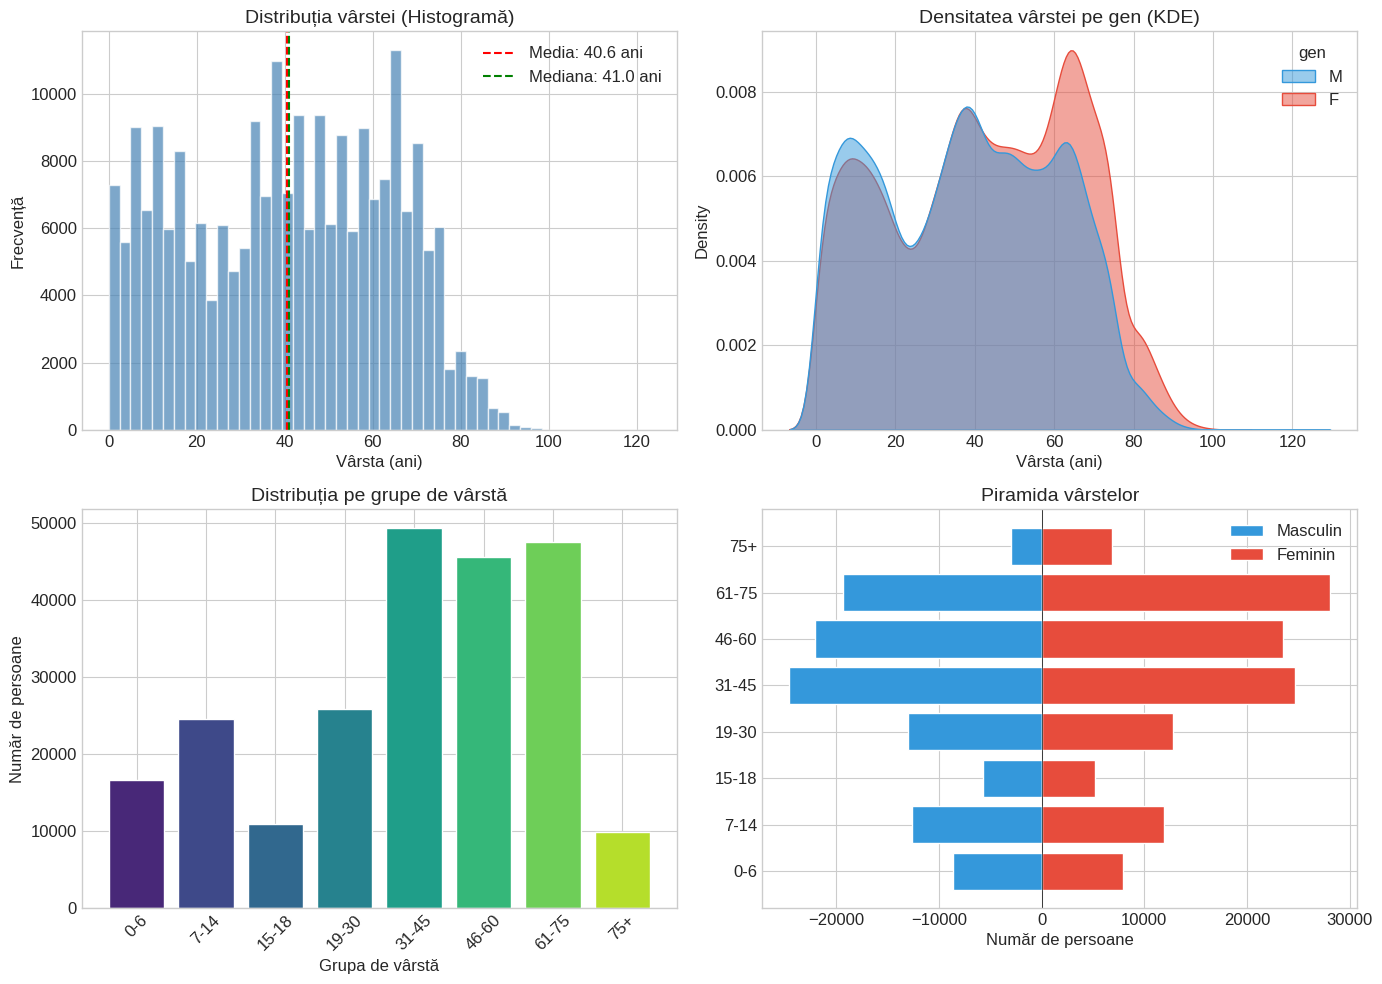

In [88]:
# =============================================================================
# ANALIZA DISTRIBUȚIEI VÂRSTEI - 4 TIPURI DE VIZUALIZĂRI
# =============================================================================
# 
# Vârsta este una dintre cele mai importante variabile demografice.
# O vom vizualiza în 4 moduri diferite, fiecare oferind perspective unice:
# 1. Histogramă - distribuția generală
# 2. KDE (Kernel Density Estimation) - comparație pe gen
# 3. Bare pe grupe de vârstă - categorii predefinite
# 4. Piramida vârstelor - vizualizare demografică clasică

# Creăm o figură cu 4 grafice (2×2)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# =============================================================================
# GRAFIC 1: HISTOGRAMA (axes[0, 0])
# =============================================================================
# 
# CE ESTE O HISTOGRAMĂ?
# ---------------------
# O histogramă împarte datele în intervale (bins) și numără câte valori
# se încadrează în fiecare interval. Arată "forma" distribuției datelor.
#
# ax.hist() - Parametri:
# - data: seria de date (aici: vârstele)
# - bins: numărul de intervale sau lista de limite
# - edgecolor: culoarea marginilor barelor
# - alpha: transparența (0=invizibil, 1=opac)
# - color: culoarea de umplere

# .dropna() elimină valorile NaN (lipsă) pentru a evita erori
axes[0, 0].hist(df_clean['age_h'].dropna(),  # Datele (vârstele fără NaN)
                bins=50,                      # 50 de intervale
                edgecolor='white',            # Margini albe pentru separare
                alpha=0.7,                    # Ușor transparent
                color='steelblue')            # Culoare albastru-oțel

axes[0, 0].set_xlabel('Vârsta (ani)')
axes[0, 0].set_ylabel('Frecvență')
axes[0, 0].set_title('Distribuția vârstei (Histogramă)')

# Adăugăm linii verticale pentru MEDIE și MEDIANĂ
# ax.axvline() desenează o linie verticală
# - x: poziția pe axa X
# - color: culoarea liniei
# - linestyle: stilul liniei ('--' = linie întreruptă)
# - label: eticheta pentru legendă
axes[0, 0].axvline(df_clean['age_h'].mean(),      # Poziția = media
                   color='red', linestyle='--',
                   label=f'Media: {df_clean["age_h"].mean():.1f} ani')
axes[0, 0].axvline(df_clean['age_h'].median(),    # Poziția = mediana
                   color='green', linestyle='--',
                   label=f'Mediana: {df_clean["age_h"].median():.1f} ani')
axes[0, 0].legend()  # Afișăm legenda

# =============================================================================
# GRAFIC 2: KDE - KERNEL DENSITY ESTIMATION (axes[0, 1])
# =============================================================================
# 
# CE ESTE KDE?
# ------------
# KDE este o metodă de a estima funcția de densitate a probabilității.
# Spre deosebire de histogramă (care are bare), KDE produce o curbă netedă.
# Aria sub curbă = 1 (sau 100% dacă gândim în procente)
#
# sns.kdeplot() - Parametri:
# - data: DataFrame-ul sursă
# - x: coloana pentru axa X
# - hue: coloana pentru a colora diferit categoriile
# - fill: True = umple aria sub curbă
# - alpha: transparența
# - palette: culorile pentru fiecare categorie

sns.kdeplot(data=df_clean,            # DataFrame-ul
            x='age_h',                # Coloana pentru X
            hue='gen',                # Colorăm diferit M și F
            fill=True,                # Umplem aria sub curbă
            alpha=0.5,                # Semi-transparent (se văd suprapunerile)
            ax=axes[0, 1],            # Pe care grafic să desenăm
            palette=['#3498db', '#e74c3c'])  # Albastru și roșu
axes[0, 1].set_xlabel('Vârsta (ani)')
axes[0, 1].set_title('Densitatea vârstei pe gen (KDE)')

# =============================================================================
# GRAFIC 3: BARE PE GRUPE DE VÂRSTĂ (axes[1, 0])
# =============================================================================
# 
# Folosim grupele de vârstă create anterior pentru o vizualizare categorică

# Definim ordinea corectă a grupelor
order = ['0-6 (preșcolari)', '7-14 (școlari)', '15-18 (adolescenți)', 
         '19-30 (tineri)', '31-45 (adulți tineri)', '46-60 (adulți)', 
         '61-75 (vârstnici)', '75+ (longevivi)']

# Numărăm și reordonăm conform listei
# .reindex(order) reordonează conform listei specificată
grupa_counts = df_clean['grupa_varsta'].value_counts().reindex(order)

# Folosim o paletă de culori gradient (viridis)
colors_age = sns.color_palette('viridis', len(order))

# Desenăm barele
bars = axes[1, 0].bar(range(len(order)), grupa_counts.values, color=colors_age)

# Setăm etichetele axei X
# Extragem doar intervalul de vârstă (fără descriere) pentru etichete mai scurte
# label.split(' ')[0] ia doar prima parte înainte de spațiu
axes[1, 0].set_xticks(range(len(order)))
axes[1, 0].set_xticklabels([label.split(' ')[0] for label in order], rotation=45)
axes[1, 0].set_xlabel('Grupa de vârstă')
axes[1, 0].set_ylabel('Număr de persoane')
axes[1, 0].set_title('Distribuția pe grupe de vârstă')

# =============================================================================
# GRAFIC 4: PIRAMIDA VÂRSTELOR (axes[1, 1])
# =============================================================================
# 
# CE ESTE PIRAMIDA VÂRSTELOR?
# ---------------------------
# Este o vizualizare demografică clasică:
# - Bărbații în stânga (valori negative)
# - Femeile în dreapta (valori pozitive)
# - Grupele de vârstă pe verticală (cele tinere jos, cele în vârstă sus)
#
# Forma piramidei ne spune multe despre populație:
# - Triunghi: populație tânără, natalitate mare
# - Dreptunghi: populație stabilă
# - Triunghi inversat: populație îmbătrânită

# groupby().size().unstack() - creează un tabel cu gen pe coloane
# .unstack() transformă unul dintre indexuri în coloane
# fill_value=0 înlocuiește NaN cu 0
age_sex = df_clean.groupby(['grupa_varsta', 'gen']).size().unstack(fill_value=0)
age_sex = age_sex.reindex(order)  # Reordonăm

# Poziția pe Y pentru fiecare grupă
y_pos = range(len(order))

# Desenăm barele orizontale
# Pentru bărbați: valori NEGATIVE (în stânga)
# Pentru femei: valori pozitive (în dreapta)
axes[1, 1].barh(y_pos, -age_sex['M'], color='#3498db', label='Masculin')
axes[1, 1].barh(y_pos, age_sex['F'], color='#e74c3c', label='Feminin')

# Configurăm axele
axes[1, 1].set_yticks(y_pos)
axes[1, 1].set_yticklabels([label.split(' ')[0] for label in order])
axes[1, 1].set_xlabel('Număr de persoane')
axes[1, 1].set_title('Piramida vârstelor')
axes[1, 1].legend()
# Linie verticală la 0 pentru a separa cele două părți
axes[1, 1].axvline(0, color='black', linewidth=0.5)

plt.tight_layout()
plt.show()

### Interpretare - Distribuția Vârstei:

1. **Histogramă**: Distribuția vârstei nu este uniformă, cu vârfuri în jurul vârstei de 30-40 ani
2. **KDE pe gen**: Femeile au o ușoară preponderență în grupele de vârstă mai înaintată (reflectând speranța de viață mai mare)
3. **Grupe de vârstă**: Grupele de adulți activi (31-60 ani) sunt cele mai numeroase
4. **Piramida vârstelor**: Formă tipică pentru o populație în tranziție demografică, cu:
   - Bază mai îngustă (natalitate în scădere)
   - Lărgime mare la mijloc (generația baby-boom)
   - Dezechilibru de gen la vârste înaintate

### 6.4 Distribuția pe Etnii

In [89]:
# =============================================================================
# ANALIZA DISTRIBUȚIEI PE ETNII
# =============================================================================
# 
# Vom analiza compoziția etnică a populației.
# Această analiză este similară cu cea de regiuni, dar pentru etnii.

# -----------------------------------------------------------------------------
# PASUL 1: Numărăm persoanele pentru fiecare etnie
# -----------------------------------------------------------------------------
etnie_counts = df_clean['etnie'].value_counts()

# -----------------------------------------------------------------------------
# PASUL 2: Calculăm procentele
# -----------------------------------------------------------------------------
etnie_pct = (etnie_counts / len(df_clean) * 100).round(2)

# -----------------------------------------------------------------------------
# PASUL 3: Creăm un DataFrame cu rezultatele
# -----------------------------------------------------------------------------
etnie_stats = pd.DataFrame({
    'Număr': etnie_counts,
    'Procent (%)': etnie_pct
})

# Afișăm rezultatele
print("Distribuția pe etnii:")
print("="*50)
print(etnie_stats)

Distribuția pe etnii:
                      Număr  Procent (%)
etnie                                   
Moldovenească        178393        76.79
Română                18289         7.87
Ucraineană            12019         5.17
Găgăuză                9791         4.21
Rusă                   7556         3.25
Bulgară                3715         1.60
Alta                   1295         0.56
Țigănească / Romani     925         0.40
Nu au declarat          326         0.14


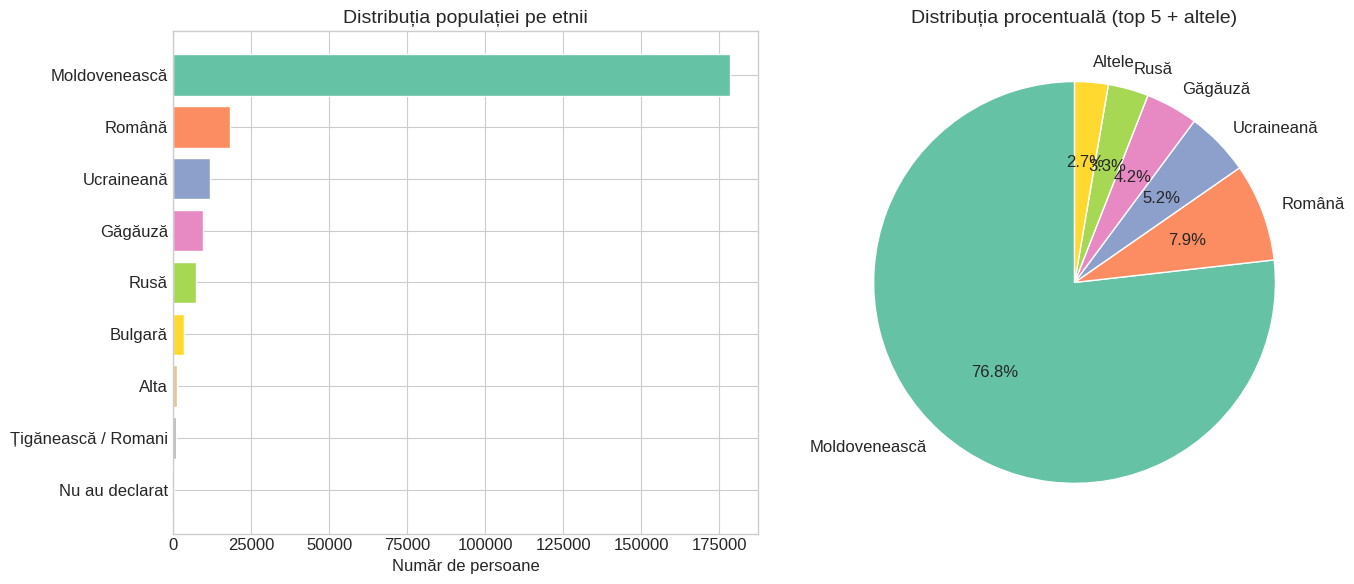

In [90]:
# =============================================================================
# VIZUALIZAREA DISTRIBUȚIEI PE ETNII
# =============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# -----------------------------------------------------------------------------
# GRAFIC 1: Bare orizontale (barh) - mai bun pentru etichete lungi
# -----------------------------------------------------------------------------
# Folosim barh (bar horizontal) pentru că numele etniilor sunt lungi
# Barele orizontale permit citirea mai ușoară a etichetelor
colors_eth = sns.color_palette('Set2', len(etnie_counts))
bars = axes[0].barh(etnie_counts.index,    # Etichetele pe axa Y
                     etnie_counts.values,   # Valorile = lungimea barelor
                     color=colors_eth)
axes[0].set_xlabel('Număr de persoane')
axes[0].set_title('Distribuția populației pe etnii')
# invert_yaxis() pune cea mai mare valoare sus (mai intuitiv)
axes[0].invert_yaxis()

# -----------------------------------------------------------------------------
# GRAFIC 2: Pie chart cu grupare "Altele"
# -----------------------------------------------------------------------------
# 
# PROBLEMA: Graficele pie cu multe felii mici sunt greu de citit
# SOLUȚIA: Grupăm categoriile mici într-o singură categorie "Altele"
# 
# .head(5) ia primele 5 etnii (cele mai numeroase)
# [5:] ia restul (de la index 5 până la final)
# .sum() însumează valorile lor

top_5 = etnie_counts.head(5)                    # Primele 5 etnii
altele = etnie_counts[5:].sum()                 # Suma celorlalte
# pd.concat() combină două Series într-una singură
# pd.Series({'Altele': altele}) creează o Series cu o singură valoare
pie_data = pd.concat([top_5, pd.Series({'Altele': altele})])

# Desenăm pie chart-ul
# ax.pie() returnează 3 obiecte: wedges, texts, autotexts
wedges, texts, autotexts = axes[1].pie(
    pie_data.values,
    labels=pie_data.index,
    autopct='%1.1f%%',                          # Format: 76.8%
    startangle=90,
    colors=sns.color_palette('Set2', len(pie_data))
)
axes[1].set_title('Distribuția procentuală (top 5 + altele)')

plt.tight_layout()
plt.show()

### Interpretare - Distribuția pe Etnii:

- **Moldovenii** reprezintă majoritatea absolută (~75%)
- **Minoritățile principale**: Români, Ucraineni, Ruși, Găgăuzi, Bulgari
- Republica Moldova are o populație relativ omogenă din punct de vedere etnic, dar cu minorități semnificative
- Comunitatea **Țigănească/Romani** și alte minorități reprezintă o proporție mai mică

### 6.5 Distribuția Urban/Rural

In [91]:
# =============================================================================
# ANALIZA DISTRIBUȚIEI URBAN/RURAL PE REGIUNI
# =============================================================================
# 
# Vom analiza ce procent din populație locuiește în urban vs rural,
# și cum variază acest lucru între regiuni.
#
# FUNCȚIA pd.crosstab() - TABEL DE CONTINGENȚĂ
# --------------------------------------------
# Creează un tabel care numără combinațiile dintre două variabile.
# Similar cu un tabel pivot din Excel.
#
# Sintaxa: pd.crosstab(index, columns, normalize)
# - index: variabila pentru rânduri
# - columns: variabila pentru coloane
# - normalize: 'index' = procente pe rânduri, 'columns' = pe coloane, 'all' = total
#
# Exemplu rezultat:
#               rural   urban
# Centru         80.6    19.4
# Mun. Chisinau  11.7    88.3
# ...
#
# Fiecare rând sumează 100% (pentru că normalize='index')

# Creăm tabelul de contingență
# normalize='index' = procentele sunt calculate pe RÂNDURI (pe fiecare regiune)
urban_regiune = pd.crosstab(df_clean['regiune'],     # Rânduri = regiuni
                            df_clean['mediu'],       # Coloane = urban/rural
                            normalize='index') * 100  # Transformăm în procente

print("Procentul urban/rural pe regiuni:")
print("="*50)
# .round(1) rotunjește la 1 zecimală
print(urban_regiune.round(1))

Procentul urban/rural pe regiuni:
mediu          rural  urban
regiune                    
Centru          80.6   19.4
Mun. Chisinau   11.7   88.3
Nord            65.8   34.2
Sud             74.5   25.5
UTAG            57.5   42.5


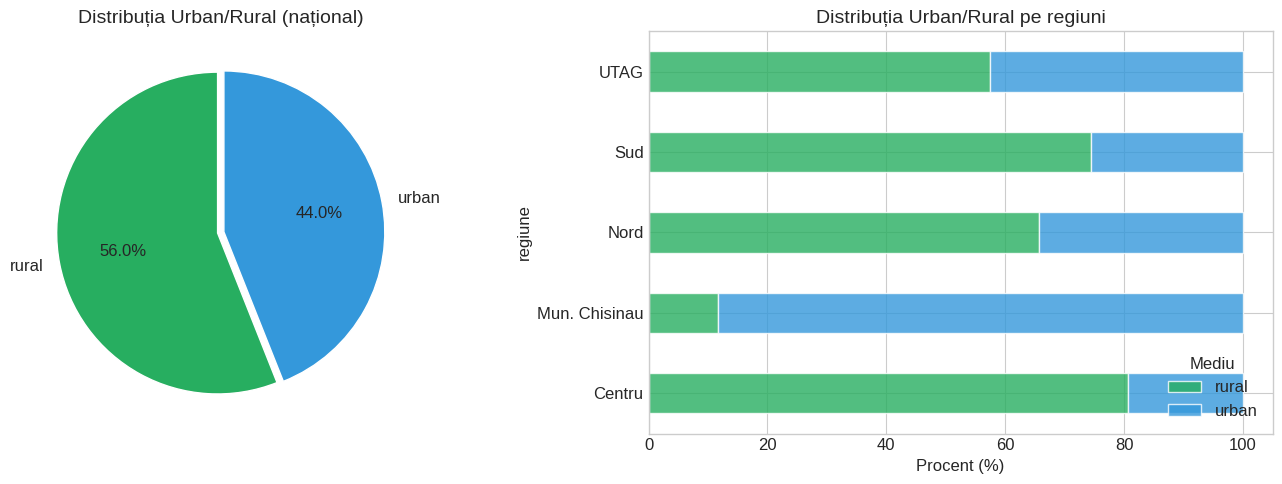

In [92]:
# =============================================================================
# VIZUALIZAREA DISTRIBUȚIEI URBAN/RURAL
# =============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# -----------------------------------------------------------------------------
# GRAFIC 1: Pie chart pentru totalul național
# -----------------------------------------------------------------------------
# Arată proporția totală urban/rural în întreaga populație
urban_total = df_clean['mediu'].value_counts()
axes[0].pie(urban_total.values,
            labels=urban_total.index,
            autopct='%1.1f%%',
            colors=['#27ae60', '#3498db'],   # Verde pentru rural, albastru pentru urban
            startangle=90,
            explode=[0.02, 0.02])
axes[0].set_title('Distribuția Urban/Rural (național)')

# -----------------------------------------------------------------------------
# GRAFIC 2: Stacked bar chart - bare suprapuse pe regiuni
# -----------------------------------------------------------------------------
# 
# CE ESTE UN STACKED BAR CHART?
# -----------------------------
# Este un grafic cu bare unde fiecare bară este împărțită în segmente.
# Totalul barei = 100% (sau suma valorilor)
# Segmentele arată compoziția fiecărei categorii.
#
# DataFrame.plot() - Metodă pandas pentru grafice rapide
# Parametri:
# - kind: tipul graficului ('bar', 'barh', 'line', 'pie', etc.)
# - stacked: True = barele sunt suprapuse
# - ax: pe care Axes să deseneze
# - color: lista de culori
# - alpha: transparența

# Folosim metoda .plot() direct pe DataFrame
# Aceasta este o scurtătură convenabilă în pandas
urban_regiune.plot(kind='barh',              # Bare orizontale
                   stacked=True,              # Suprapuse (stacked)
                   ax=axes[1],                # Pe al doilea grafic
                   color=['#27ae60', '#3498db'],  # Verde și albastru
                   alpha=0.8)                 # Ușor transparent

axes[1].set_xlabel('Procent (%)')
axes[1].set_title('Distribuția Urban/Rural pe regiuni')
# Mutăm legenda în colțul din dreapta-jos pentru a nu acoperi barele
axes[1].legend(title='Mediu', loc='lower right')

plt.tight_layout()
plt.show()

### Interpretare - Distribuția Urban/Rural:

- La nivel național, aproximativ **42% din populație locuiește în mediul urban**
- **Mun. Chișinău** este exclusiv urban (~100%)
- **UTAG** și regiunile **Nord/Sud/Centru** au o pondere mai mare a populației rurale
- Moldova rămâne o țară preponderent rurală în comparație cu media europeană

### 6.6 Analiza Nivelului de Educație

In [93]:
# =============================================================================
# ANALIZA NIVELULUI DE EDUCAȚIE
# =============================================================================
# 
# Vom analiza distribuția populației pe niveluri de educație.
# Această analiză este importantă pentru:
# - Politici educaționale
# - Planificarea pieței muncii
# - Înțelegerea capitalului uman al țării

# -----------------------------------------------------------------------------
# PASUL 1: Numărăm persoanele pentru fiecare nivel de educație
# -----------------------------------------------------------------------------
edu_counts = df_clean['educatie'].value_counts()

# -----------------------------------------------------------------------------
# PASUL 2: Afișăm rezultatele într-un format ușor de citit
# -----------------------------------------------------------------------------
print("Distribuția pe nivel de educație:")
print("="*70)

# Iterăm prin rezultate cu for...in
# .items() returnează perechi (index, valoare) pentru fiecare element
for edu, count in edu_counts.items():
    # Calculăm procentul pentru fiecare nivel
    pct = count / len(df_clean) * 100
    # Afișăm: numele nivelului, numărul de persoane și procentul
    print(f"{edu}: {count:,} ({pct:.1f}%)")

Distribuția pe nivel de educație:
gimnazial (mediu incomplet): 47,036 (20.2%)
profesional tehnic secundar (școală profesională/meserii, «PTU»): 42,079 (18.1%)
profesional tehnic postsecundar (colegiu, «tehnicum», școală în domeniul medical, farmaceutic, pedagogic și arte finalizate până în 1995): 27,367 (11.8%)
liceal (10-12 clase)/mediu general (10-11 clase): 26,325 (11.3%)
primar: 18,182 (7.8%)
 superior (ciclul I)/licență: 17,066 (7.3%)
superior universitar finalizat până în 2008: 14,345 (6.2%)
 superior(ciclul II)/masterat: 6,446 (2.8%)
educație preșcolară: 3,471 (1.5%)
fără școală absolvită: 1,188 (0.5%)
superior(ciclul III)/doctorat, postdoctorat: 436 (0.2%)


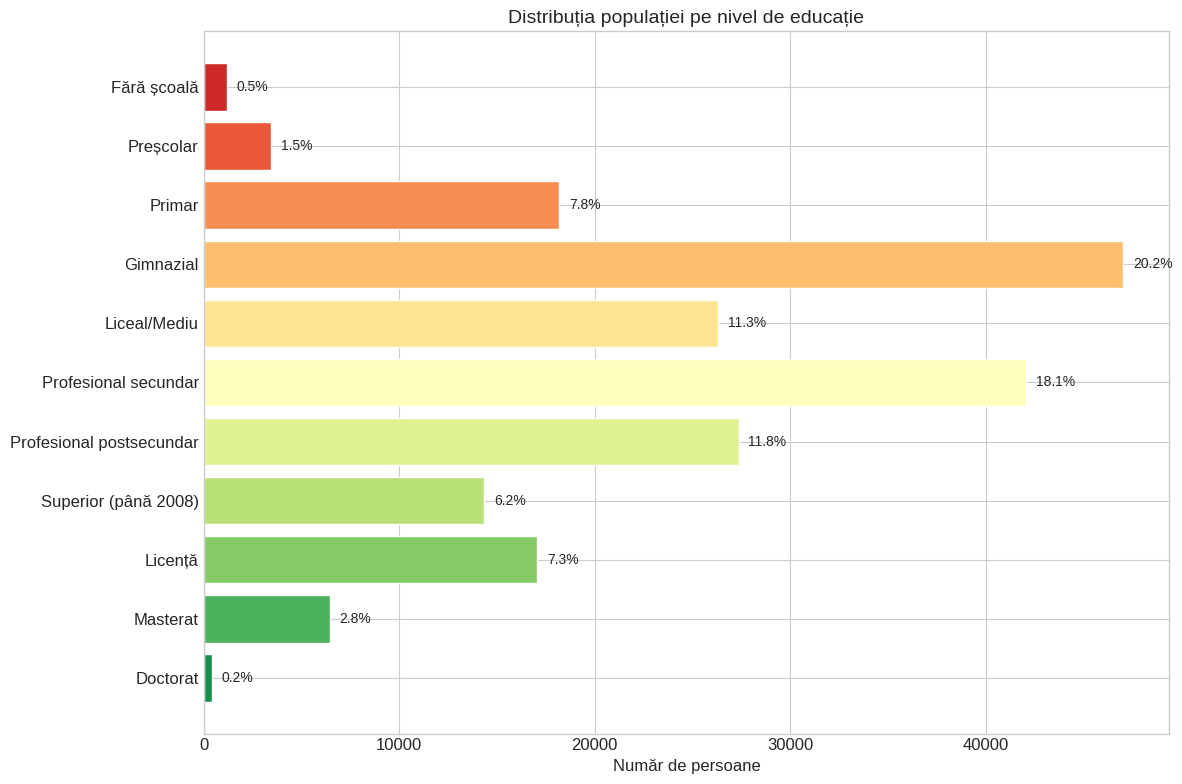

In [94]:
# =============================================================================
# VIZUALIZAREA NIVELULUI DE EDUCAȚIE
# =============================================================================
# 
# Problema: Etichetele nivelurilor de educație sunt foarte lungi
# Soluția: Creăm etichete scurte pentru grafic, păstrând ordinea logică

fig, ax = plt.subplots(figsize=(12, 8))

# -----------------------------------------------------------------------------
# PASUL 1: Definim ordinea logică a nivelurilor de educație
# -----------------------------------------------------------------------------
# Ordinea de la cel mai scăzut la cel mai ridicat nivel
edu_order = [
    'fără școală absolvită',
    'educație preșcolară', 
    'primar',
    'gimnazial (mediu incomplet)',
    'liceal (10-12 clase)/mediu general (10-11 clase)',
    'profesional tehnic secundar (școală profesională/meserii, «PTU»)',
    'profesional tehnic postsecundar (colegiu, «tehnicum», școală în domeniul medical, farmaceutic, pedagogic și arte finalizate până în 1995)',
    'superior universitar finalizat până în 2008',
    ' superior (ciclul I)/licență',
    ' superior(ciclul II)/masterat',
    'superior(ciclul III)/doctorat, postdoctorat'
]

# -----------------------------------------------------------------------------
# PASUL 2: Filtrăm și ordonăm datele
# -----------------------------------------------------------------------------
# Nu toate nivelurile pot exista în date, așa că filtrăm
# List comprehension cu condiție: [x for x in lista if condiție]
edu_order_filtered = [e for e in edu_order if e in edu_counts.index]
# .reindex() reordonează Series conform listei specificată
edu_sorted = edu_counts.reindex(edu_order_filtered)

# -----------------------------------------------------------------------------
# PASUL 3: Creăm etichete scurte pentru lizibilitate
# -----------------------------------------------------------------------------
# Etichetele lungi nu încap pe grafic, așa că le prescurtăm
short_labels = [
    'Fără școală',
    'Preșcolar',
    'Primar',
    'Gimnazial',
    'Liceal/Mediu',
    'Profesional secundar',
    'Profesional postsecundar',
    'Superior (până 2008)',
    'Licență',
    'Masterat',
    'Doctorat'
]

# -----------------------------------------------------------------------------
# PASUL 4: Desenăm graficul cu bare orizontale
# -----------------------------------------------------------------------------
# Folosim o paletă de culori gradient de la roșu la verde
# Sugerează vizual "mai puțin" spre "mai mult" educație
colors_edu = sns.color_palette('RdYlGn', len(edu_sorted))

# Desenăm barele
bars = ax.barh(range(len(edu_sorted)), edu_sorted.values, color=colors_edu)

# Setăm etichetele pe axa Y
ax.set_yticks(range(len(edu_sorted)))
# Luăm doar atâtea etichete scurte cât avem niveluri în date
ax.set_yticklabels(short_labels[:len(edu_sorted)])

ax.set_xlabel('Număr de persoane')
ax.set_title('Distribuția populației pe nivel de educație')
# invert_yaxis() pune nivelurile scăzute sus (pentru a citi de sus în jos)
ax.invert_yaxis()

# -----------------------------------------------------------------------------
# PASUL 5: Adăugăm procentele la sfârșitul fiecărei bare
# -----------------------------------------------------------------------------
for bar, val in zip(bars, edu_sorted.values):
    pct = val / len(df_clean) * 100
    # Adăugăm textul la 500 de unități după bară
    ax.text(bar.get_width() + 500,
            bar.get_y() + bar.get_height()/2,
            f'{pct:.1f}%',
            va='center', fontsize=10)

plt.tight_layout()
plt.show()

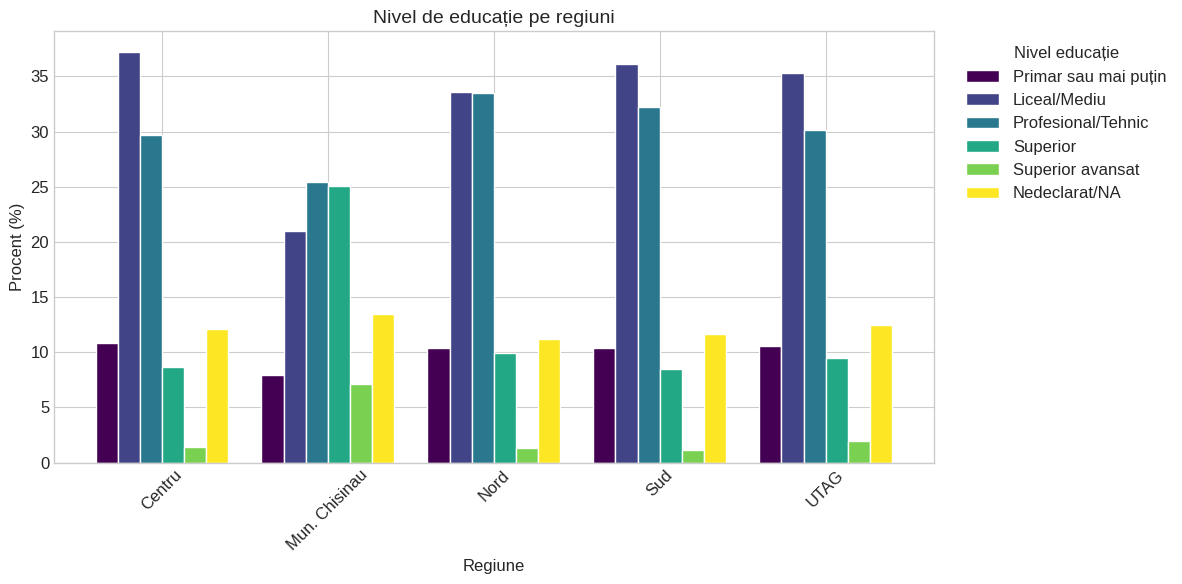

In [95]:
# =============================================================================
# EDUCAȚIE PE REGIUNI - CU CATEGORII SIMPLIFICATE
# =============================================================================
# 
# Pentru o analiză comparativă între regiuni, simplificăm nivelurile de
# educație în categorii mai largi. Aceasta face comparația mai ușoară.
#
# FUNCȚII PERSONALIZATE (USER-DEFINED FUNCTIONS)
# ----------------------------------------------
# În Python putem defini funcții proprii cu cuvântul cheie 'def'
# Sintaxa: def nume_functie(parametri):
#              # corpul funcției
#              return rezultat
#
# METODA .apply()
# ---------------
# Series.apply(funcție) aplică funcția pe FIECARE element din Series
# Este echivalentul unui for loop, dar mai rapid și mai elegant

# -----------------------------------------------------------------------------
# PASUL 1: Definim funcția de simplificare a nivelurilor de educație
# -----------------------------------------------------------------------------
def simplify_education(edu):
    """
    Funcție care grupează nivelurile de educație în categorii mai largi.
    
    Parametri:
    - edu: string-ul cu nivelul de educație
    
    Returnează:
    - string cu categoria simplificată
    """
    # Verificăm mai întâi dacă valoarea este NaN (lipsă)
    # pd.isna() returnează True pentru NaN
    if pd.isna(edu):
        return 'Nedeclarat/NA'
    
    # Convertim la lowercase pentru a face comparațiile case-insensitive
    # .lower() transformă "ABC" în "abc"
    edu_lower = edu.lower()
    
    # Verificăm în ce categorie se încadrează
    # 'in' verifică dacă un substring există în string
    if 'doctorat' in edu_lower or 'masterat' in edu_lower:
        return 'Superior avansat'
    elif 'superior' in edu_lower or 'licență' in edu_lower:
        return 'Superior'
    elif 'profesional' in edu_lower or 'postsecundar' in edu_lower:
        return 'Profesional/Tehnic'
    elif 'liceal' in edu_lower or 'mediu' in edu_lower:
        return 'Liceal/Mediu'
    elif 'gimnazial' in edu_lower:
        return 'Gimnazial'
    else:
        # Tot ce nu se încadrează în categoriile de mai sus
        return 'Primar sau mai puțin'

# -----------------------------------------------------------------------------
# PASUL 2: Aplicăm funcția pe coloana de educație
# -----------------------------------------------------------------------------
# .apply() aplică funcția pe fiecare valoare din coloană
df_clean['educatie_simplificata'] = df_clean['educatie'].apply(simplify_education)

# -----------------------------------------------------------------------------
# PASUL 3: Creăm tabelul de contingență educație vs regiune
# -----------------------------------------------------------------------------
# normalize='index' = procentele sunt pe RÂNDURI (fiecare regiune = 100%)
edu_regiune = pd.crosstab(df_clean['regiune'],
                          df_clean['educatie_simplificata'], 
                          normalize='index') * 100

# -----------------------------------------------------------------------------
# PASUL 4: Vizualizăm rezultatele
# -----------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 6))

# Definim ordinea dorită pentru nivelurile de educație
edu_order_simple = ['Primar sau mai puțin', 'Gimnazial', 'Liceal/Mediu', 
                    'Profesional/Tehnic', 'Superior', 'Superior avansat', 'Nedeclarat/NA']

# Reordonăm coloanele conform ordinii dorite
# List comprehension filtrează doar coloanele care există
edu_regiune = edu_regiune.reindex(columns=[c for c in edu_order_simple if c in edu_regiune.columns])

# Folosim metoda .plot() din pandas pentru grafic rapid
# kind='bar' = bare verticale
# colormap='viridis' = paletă de culori
# width = lățimea barelor (implicit 0.5)
edu_regiune.plot(kind='bar', ax=ax, colormap='viridis', width=0.8)

ax.set_xlabel('Regiune')
ax.set_ylabel('Procent (%)')
ax.set_title('Nivel de educație pe regiuni')
# bbox_to_anchor poziționează legenda în afara graficului
ax.legend(title='Nivel educație', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Interpretare - Nivel de Educație:

1. **Nivel gimnazial** este cel mai frecvent, reprezentând baza educațională a populației
2. **Educația superioară** (licență, masterat, doctorat) reprezintă o proporție semnificativă
3. **Mun. Chișinău** are cea mai mare concentrație de persoane cu studii superioare (fiind centrul universitar principal)
4. **Regiunile rurale** (Nord, Sud, UTAG) au o proporție mai mare de persoane cu educație medie sau mai puțin

**Valorile lipsă** (~14%) corespund în principal copiilor sub vârsta școlară.

### 6.7 Analiza Limbilor Vorbite

In [96]:
# =============================================================================
# ANALIZA LIMBILOR VORBITE
# =============================================================================
# 
# Vom analiza ce limbi sunt cele mai vorbite în Republica Moldova.
# "Limba vorbită" se referă la limba de comunicare obișnuită (nu neapărat maternă).

# -----------------------------------------------------------------------------
# PASUL 1: Numărăm și luăm doar Top 10 limbi
# -----------------------------------------------------------------------------
# .head(10) selectează primele 10 cele mai frecvente
limba_counts = df_clean['limba_vorbita'].value_counts().head(10)

# -----------------------------------------------------------------------------
# PASUL 2: Afișăm rezultatele
# -----------------------------------------------------------------------------
print("Top 10 limbi vorbite (limba de comunicare obișnuită):")
print("="*50)

# Iterăm prin rezultate și afișăm formatat
for limba, count in limba_counts.items():
    pct = count / len(df_clean) * 100
    print(f"{limba}: {count:,} ({pct:.1f}%)")

Top 10 limbi vorbite (limba de comunicare obișnuită):
Moldovenească: 103,181 (44.4%)
Română: 74,244 (32.0%)
Rusă: 34,758 (15.0%)
Găgăuză: 5,125 (2.2%)
Ucraineană: 4,833 (2.1%)
Bulgară: 1,735 (0.7%)
Țigănească / Romani: 580 (0.2%)
Engleză: 147 (0.1%)
Nu declar: 112 (0.0%)
Limbi din Asia de Sud: 67 (0.0%)


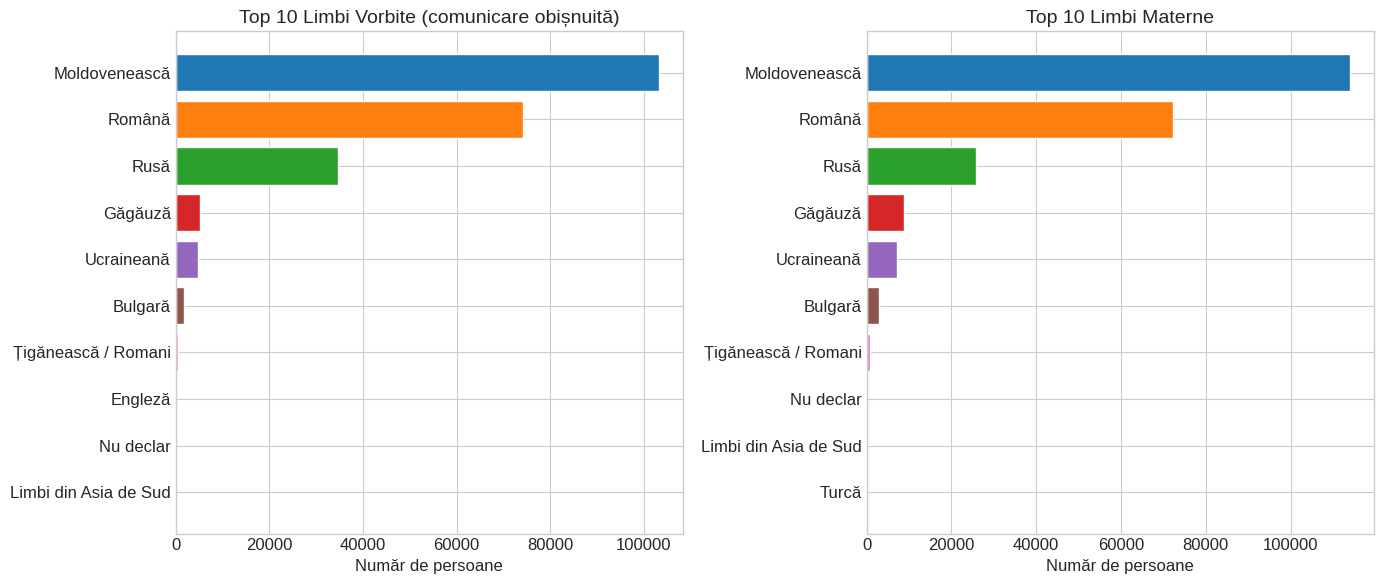

In [97]:
# =============================================================================
# VIZUALIZAREA LIMBILOR VORBITE VS LIMBA MATERNĂ
# =============================================================================
# 
# Comparăm limba vorbită (de comunicare) cu limba maternă (prima învățată).
# Diferențele pot indica:
# - Asimilare lingvistică
# - Bilingvism
# - Preferințe de comunicare

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Definim culorile
colors_lang = sns.color_palette('tab10', len(limba_counts))

# -----------------------------------------------------------------------------
# GRAFIC 1: Limba vorbită (de comunicare obișnuită)
# -----------------------------------------------------------------------------
axes[0].barh(limba_counts.index, limba_counts.values, color=colors_lang)
axes[0].set_xlabel('Număr de persoane')
axes[0].set_title('Top 10 Limbi Vorbite (comunicare obișnuită)')
# invert_yaxis() pentru a avea cea mai frecventă limbă sus
axes[0].invert_yaxis()

# -----------------------------------------------------------------------------
# GRAFIC 2: Limba maternă (prima limbă învățată)
# -----------------------------------------------------------------------------
limba_materna_counts = df_clean['limba_materna'].value_counts().head(10)
axes[1].barh(limba_materna_counts.index, limba_materna_counts.values, 
             color=colors_lang)
axes[1].set_xlabel('Număr de persoane')
axes[1].set_title('Top 10 Limbi Materne')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

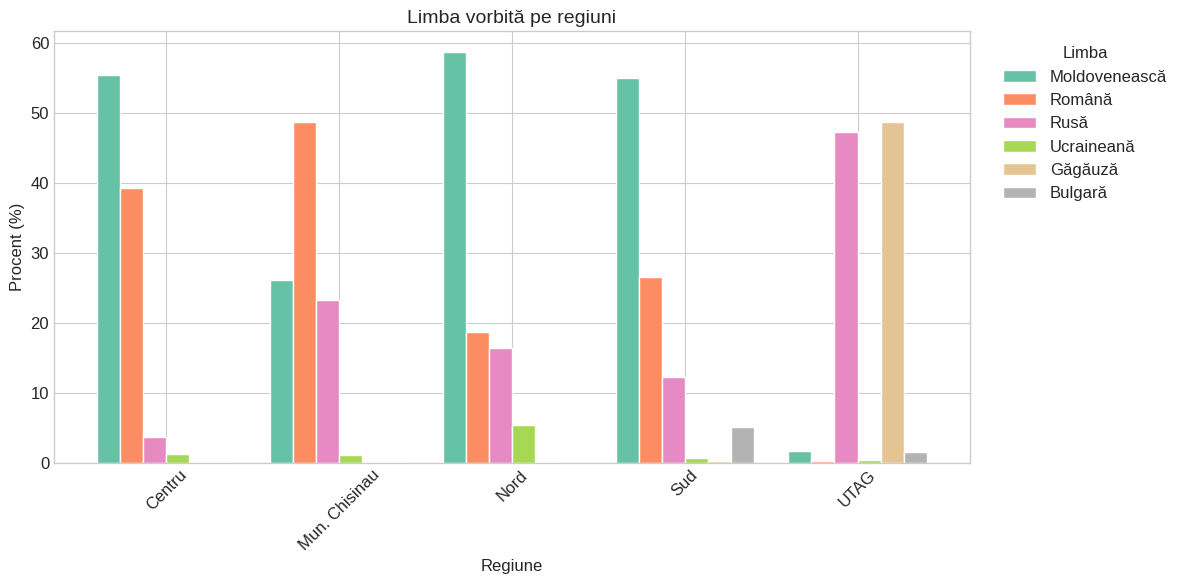

In [98]:
# =============================================================================
# LIMBA VORBITĂ PE REGIUNI
# =============================================================================
# 
# Analizăm variația limbilor vorbite între regiuni.
# Aceasta poate evidenția concentrări ale minorităților lingvistice.

# -----------------------------------------------------------------------------
# PASUL 1: Creăm tabelul de contingență limbă vs regiune
# -----------------------------------------------------------------------------
limba_regiune = pd.crosstab(df_clean['regiune'],
                            df_clean['limba_vorbita'], 
                            normalize='index') * 100

# -----------------------------------------------------------------------------
# PASUL 2: Selectăm doar limbile principale pentru claritate
# -----------------------------------------------------------------------------
# Un grafic cu toate limbile ar fi prea încărcat
limbi_principale = ['Moldovenească', 'Română', 'Rusă', 'Ucraineană', 'Găgăuză', 'Bulgară']

# Filtrăm doar coloanele care există în date
# List comprehension: [l for l in lista if condiție]
limba_regiune_filtered = limba_regiune[[l for l in limbi_principale if l in limba_regiune.columns]]

# -----------------------------------------------------------------------------
# PASUL 3: Vizualizăm
# -----------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 6))

# Folosim .plot() pe DataFrame pentru un grouped bar chart
limba_regiune_filtered.plot(kind='bar',         # Bare verticale
                            ax=ax,               # Pe care grafic
                            colormap='Set2',     # Schema de culori
                            width=0.8)           # Lățimea grupului de bare

ax.set_xlabel('Regiune')
ax.set_ylabel('Procent (%)')
ax.set_title('Limba vorbită pe regiuni')
ax.legend(title='Limba', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Interpretare - Limbi Vorbite:

1. **Limba moldovenească și română** sunt cele mai vorbite, cu o dezbatere continuă privind denumirea
2. **Limba rusă** este a doua limbă ca frecvență, reflectând istoria sovietică și prezența minorității ruse
3. **Variații regionale semnificative**:
   - **UTAG** (Găgăuzia): proporție mare de vorbitori de găgăuză și rusă
   - **Chișinău**: diversitate lingvistică mai mare, cu prezență semnificativă a limbii ruse
4. **Multilingvism**: Multe persoane declară cunoașterea mai multor limbi

### 6.8 Analiza Stării Civile

In [99]:
# =============================================================================
# ANALIZA STĂRII CIVILE
# =============================================================================
# 
# Analizăm distribuția pe stări civile (căsătorit, necăsătorit, văduv, divorțat).
# 
# FILTRAREA DATELOR
# -----------------
# Pentru această analiză, includem doar persoanele de 18+ ani,
# deoarece starea civilă nu este relevantă pentru minori.
#
# FILTRARE ÎN PANDAS:
# df[df['coloana'] >= valoare] returnează doar rândurile care îndeplinesc condiția
# Este ca un WHERE în SQL

# -----------------------------------------------------------------------------
# PASUL 1: Filtrăm doar persoanele adulte (18+ ani)
# -----------------------------------------------------------------------------
# df_clean['age_h'] >= 18 creează o Series de True/False
# df_clean[...] selectează doar rândurile unde condiția este True
# .copy() creează o copie independentă (bună practică)
df_adulti = df_clean[df_clean['age_h'] >= 18].copy()

# -----------------------------------------------------------------------------
# PASUL 2: Numărăm persoanele pe stări civile
# -----------------------------------------------------------------------------
stare_counts = df_adulti['stare_civila'].value_counts()

# -----------------------------------------------------------------------------
# PASUL 3: Afișăm rezultatele
# -----------------------------------------------------------------------------
# len(df_adulti) = numărul de adulți (pentru context)
print(f"Analiza stării civile (persoane 18+ ani: {len(df_adulti):,})")
print("="*50)

for stare, count in stare_counts.items():
    pct = count / len(df_adulti) * 100
    # .capitalize() transformă prima literă în majusculă
    print(f"{stare.capitalize()}: {count:,} ({pct:.1f}%)")

Analiza stării civile (persoane 18+ ani: 180,643)
Casatorit: 106,019 (58.7%)
Niciodata: 35,325 (19.6%)
Vaduv: 19,689 (10.9%)
Divortat: 19,610 (10.9%)


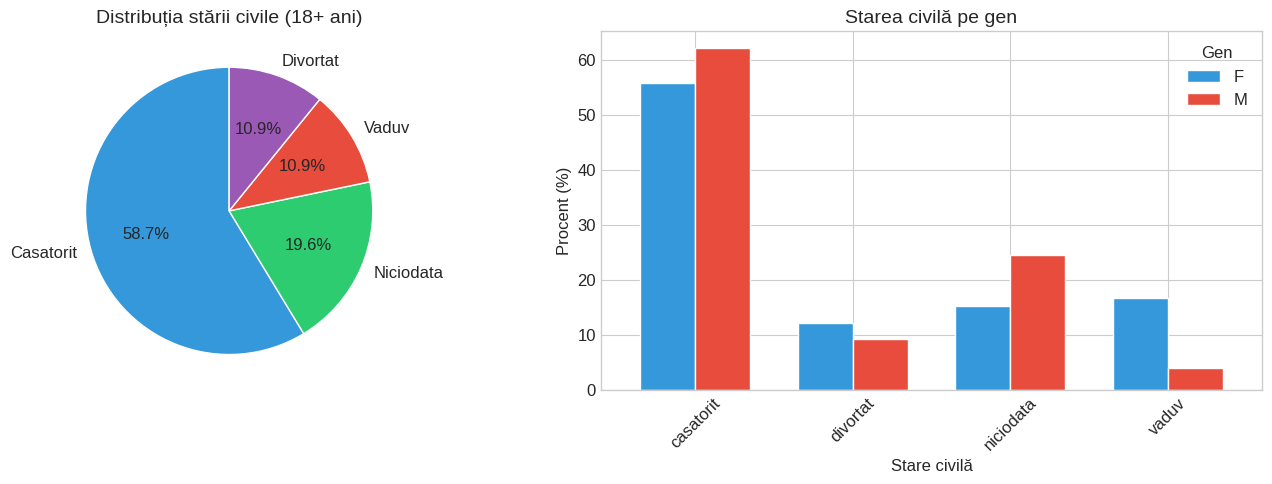

In [100]:
# =============================================================================
# VIZUALIZAREA STĂRII CIVILE - TOTAL ȘI PE GEN
# =============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Definim culori distincte pentru fiecare stare civilă
colors_marital = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6']

# -----------------------------------------------------------------------------
# GRAFIC 1: Distribuția generală (pie chart)
# -----------------------------------------------------------------------------
# List comprehension pentru a capitaliza etichetele
axes[0].pie(stare_counts.values,
            labels=[s.capitalize() for s in stare_counts.index],
            autopct='%1.1f%%',
            colors=colors_marital,
            startangle=90)
axes[0].set_title('Distribuția stării civile (18+ ani)')

# -----------------------------------------------------------------------------
# GRAFIC 2: Starea civilă pe gen
# -----------------------------------------------------------------------------
# 
# Creăm un crosstab normalizat pe coloane (fiecare gen = 100%)
# Aceasta ne arată compoziția fiecărui gen pe stări civile
# 
# normalize='columns' = procentele sunt calculate pe COLOANE
# Astfel, suma procentelor pentru M = 100% și pentru F = 100%
stare_gen = pd.crosstab(df_adulti['stare_civila'],
                        df_adulti['gen'], 
                        normalize='columns') * 100

# Desenăm graficul cu bare
stare_gen.plot(kind='bar',
               ax=axes[1],
               color=['#3498db', '#e74c3c'],  # Albastru pentru M, roșu pentru F
               width=0.7)

axes[1].set_xlabel('Stare civilă')
axes[1].set_ylabel('Procent (%)')
axes[1].set_title('Starea civilă pe gen')
axes[1].legend(title='Gen')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

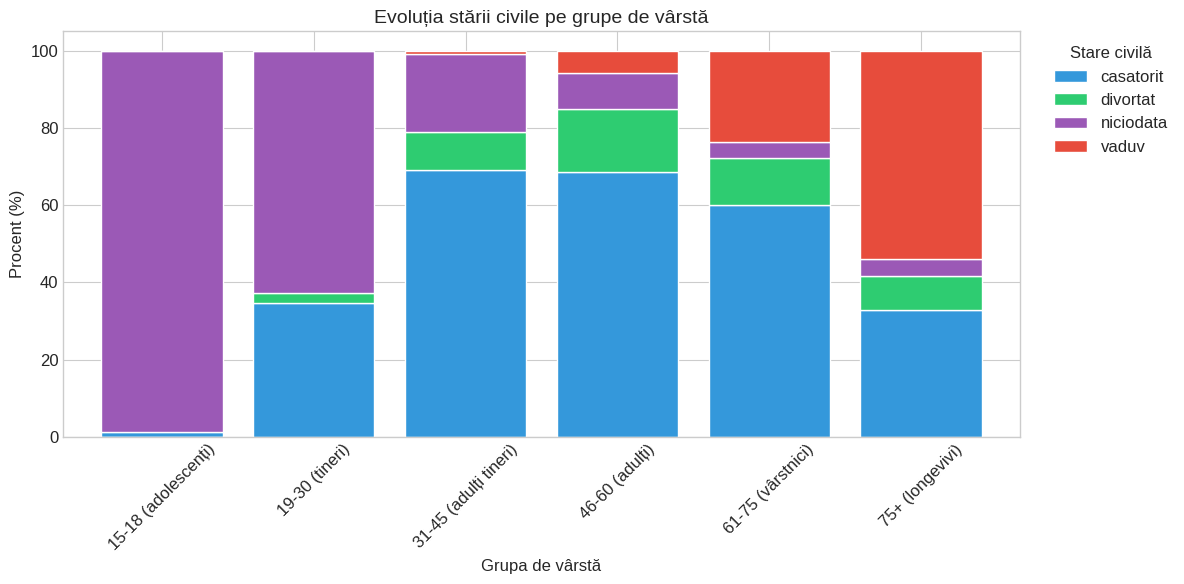

In [101]:
# =============================================================================
# STAREA CIVILĂ PE GRUPE DE VÂRSTĂ - STACKED BAR CHART
# =============================================================================
# 
# Analizăm cum evoluează starea civilă pe măsură ce oamenii îmbătrânesc.
# Acest grafic arată "ciclul vieții" din perspectiva stării civile:
# - Tineri: majoritar necăsătoriți
# - Adulți: majoritar căsătoriți
# - Vârstnici: creșterea proporției de văduvi

# -----------------------------------------------------------------------------
# PASUL 1: Creăm tabelul de contingență stare civilă vs grupă de vârstă
# -----------------------------------------------------------------------------
# normalize='index' = fiecare grupă de vârstă = 100%
stare_varsta = pd.crosstab(df_adulti['grupa_varsta'],
                           df_adulti['stare_civila'], 
                           normalize='index') * 100

# -----------------------------------------------------------------------------
# PASUL 2: Vizualizăm cu stacked bar chart
# -----------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 6))

# stacked=True face ca barele să fie suprapuse (nu alăturate)
# Aceasta arată compoziția procentuală a fiecărei grupe de vârstă
stare_varsta.plot(kind='bar',
                  stacked=True,               # Bare suprapuse
                  ax=ax,
                  color=['#3498db',           # Albastru - necăsătorit
                         '#2ecc71',           # Verde - căsătorit
                         '#9b59b6',           # Violet - văduv
                         '#e74c3c'],          # Roșu - divorțat
                  width=0.8)

ax.set_xlabel('Grupa de vârstă')
ax.set_ylabel('Procent (%)')
ax.set_title('Evoluția stării civile pe grupe de vârstă')
ax.legend(title='Stare civilă', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Interpretare - Starea Civilă:

1. **Căsătoriți** reprezintă majoritatea adulților (~50-55%)
2. **Niciodată căsătoriți** - predominant tineri (19-30 ani)
3. **Văduvi** - proporție mult mai mare la femei, explicată prin:
   - Speranța de viață mai mare a femeilor
   - Bărbații tind să se recăsătorească mai frecvent
4. **Divorțați** - proporție relativ echilibrată între genuri
5. **Evoluție pe vârstă**: 
   - Tineri: majoritar necăsătoriți
   - Adulți: majoritar căsătoriți
   - Vârstnici: creșterea proporției de văduvi

## 7. Analize Încrucișate și Corelații

### 7.1 Heatmap - Educație vs Regiune

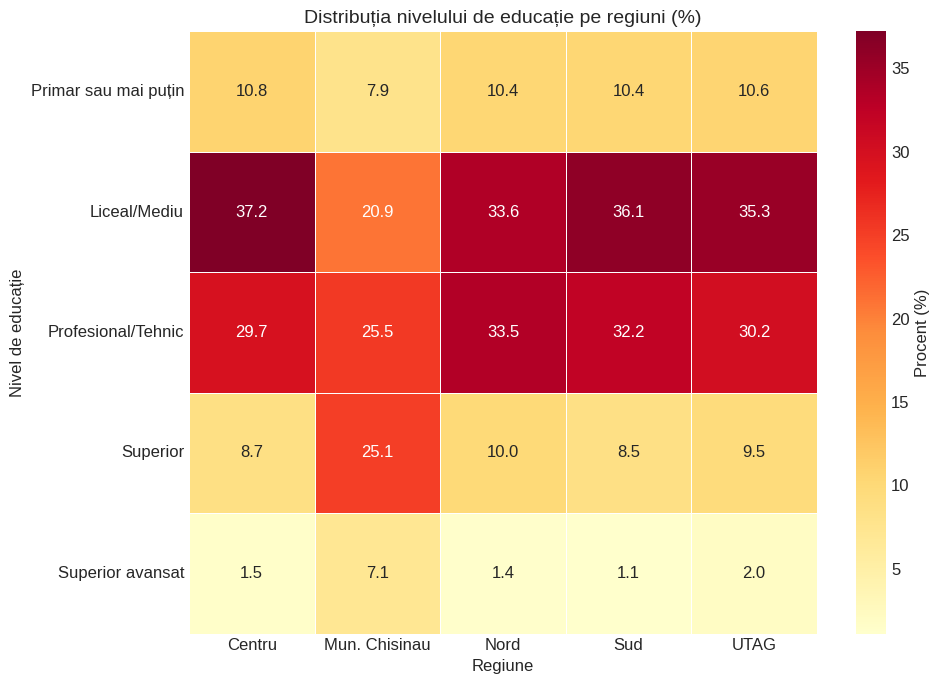

In [102]:
# =============================================================================
# HEATMAP - EDUCAȚIE VS REGIUNE
# =============================================================================
# 
# CE ESTE UN HEATMAP?
# -------------------
# Un heatmap (hartă termică) reprezintă valori numerice prin culori:
# - Culori calde (roșu, portocaliu) = valori mari
# - Culori reci (alb, galben deschis) = valori mici
# 
# Este ideal pentru a vizualiza matrici (tabele) de date și a identifica
# rapid tiparele și excepțiile.
#
# CÂND FOLOSIM HEATMAP?
# ---------------------
# - Tabele de contingență (crosstab)
# - Matrici de corelație
# - Orice date bidimensionale

# -----------------------------------------------------------------------------
# PASUL 1: Creăm tabelul de contingență educație vs regiune
# -----------------------------------------------------------------------------
edu_reg_cross = pd.crosstab(df_clean['educatie_simplificata'],
                            df_clean['regiune'], 
                            normalize='columns') * 100  # Procente pe coloane (regiuni)

# -----------------------------------------------------------------------------
# PASUL 2: Reordonăm rândurile conform ordinii logice a educației
# -----------------------------------------------------------------------------
edu_order_simple = ['Primar sau mai puțin', 'Gimnazial', 'Liceal/Mediu', 
                    'Profesional/Tehnic', 'Superior', 'Superior avansat']
# .reindex() cu list comprehension pentru a filtra doar ce există
edu_reg_cross = edu_reg_cross.reindex([e for e in edu_order_simple if e in edu_reg_cross.index])

# -----------------------------------------------------------------------------
# PASUL 3: Desenăm heatmap-ul cu seaborn
# -----------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 7))

# sns.heatmap() - Funcție seaborn pentru heatmaps
# Parametri:
# - data: matricea de date (DataFrame sau array)
# - annot: True = afișează valorile în fiecare celulă
# - fmt: formatul valorilor ('.1f' = 1 zecimală)
# - cmap: schema de culori ('YlOrRd' = Yellow-Orange-Red)
# - linewidths: grosimea liniilor între celule
# - cbar_kws: dicționar cu setări pentru bara de culori (colorbar)
sns.heatmap(edu_reg_cross,
            annot=True,               # Afișează valorile în celule
            fmt='.1f',                # Format: 1 zecimală
            cmap='YlOrRd',            # Paletă: galben -> portocaliu -> roșu
            linewidths=0.5,           # Linii subțiri între celule
            ax=ax,
            cbar_kws={'label': 'Procent (%)'})  # Etichetă pentru colorbar

ax.set_xlabel('Regiune')
ax.set_ylabel('Nivel de educație')
ax.set_title('Distribuția nivelului de educație pe regiuni (%)')

plt.tight_layout()
plt.show()

### Interpretare Heatmap:

- **Chișinău** se evidențiază cu proporția cea mai mare de studii superioare (Superior + Superior avansat)
- **UTAG** are proporția cea mai mare de educație gimnazială și mai puțin
- **Gradient clar** de la regiunile rurale spre capitală în ceea ce privește nivelul de educație

### 7.2 Vârsta medie pe categorii

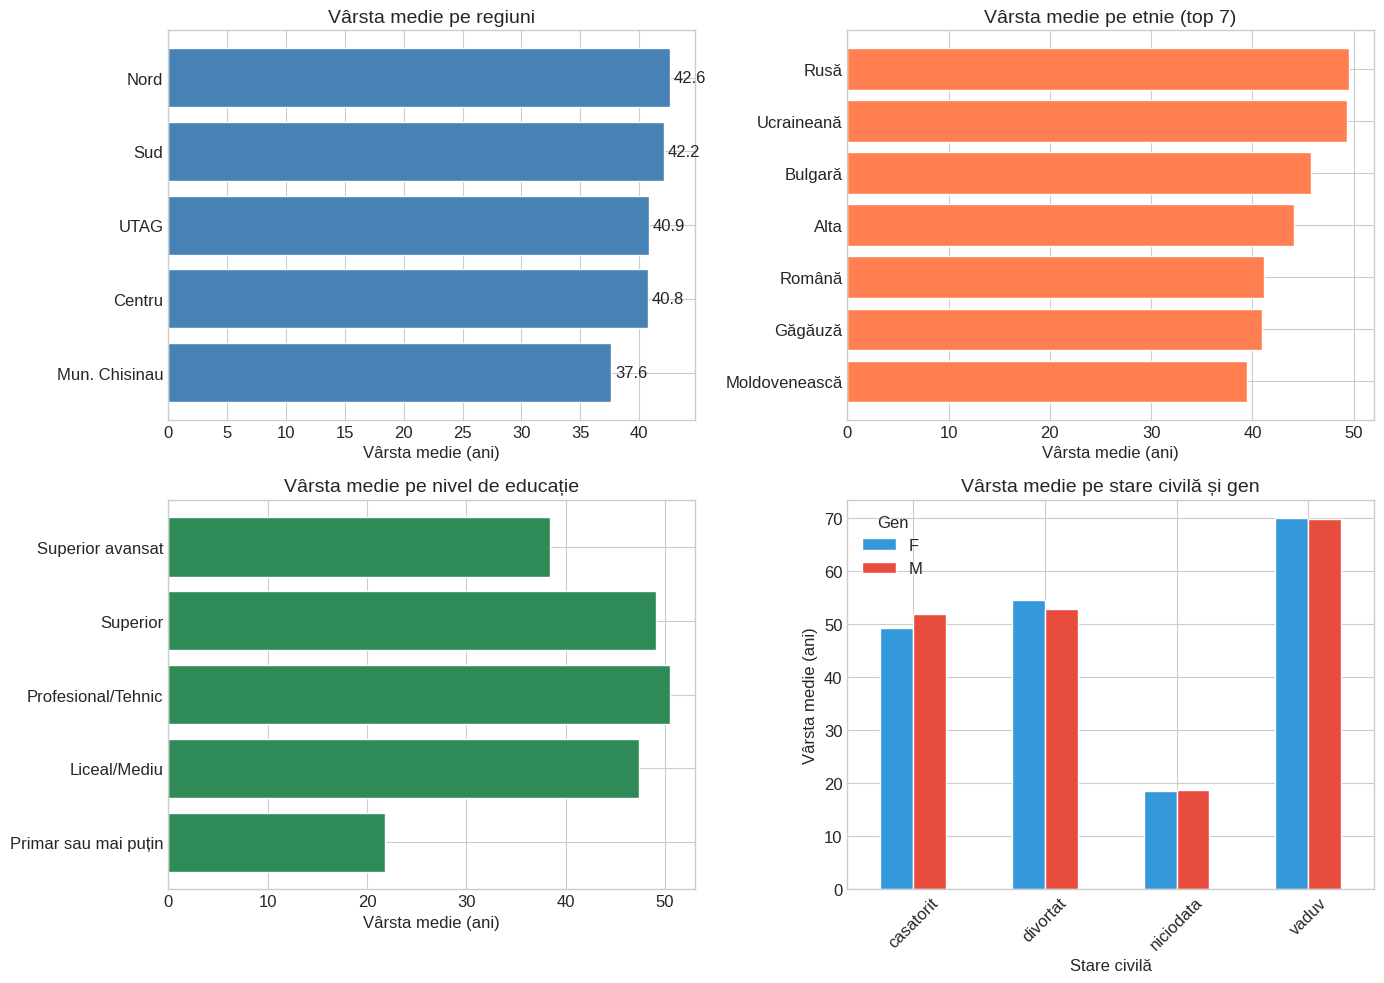

In [103]:
# =============================================================================
# VÂRSTA MEDIE PE DIFERITE CATEGORII
# =============================================================================
# 
# Analizăm cum variază vârsta medie în funcție de diferite caracteristici.
# Această analiză poate revela tipare demografice interesante.
#
# METODA groupby() + FUNCȚII DE AGREGARE
# --------------------------------------
# df.groupby('coloana')['alta_coloana'].functie() este pattern-ul central!
# 
# Ce face:
# 1. groupby() împarte datele în grupuri
# 2. Selectăm coloana de interes
# 3. Aplicăm o funcție de agregare (.mean(), .sum(), .count(), etc.)
#
# Exemplu: df.groupby('regiune')['age_h'].mean()
# = Pentru fiecare regiune, calculează media vârstelor

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# =============================================================================
# GRAFIC 1: Vârsta medie pe regiuni (axes[0, 0])
# =============================================================================
# Grupăm datele după regiune și calculăm media vârstelor
# .sort_values() sortează rezultatul crescător
age_regiune = df_clean.groupby('regiune')['age_h'].mean().sort_values()

# Desenăm bare orizontale
axes[0, 0].barh(age_regiune.index, age_regiune.values, color='steelblue')
axes[0, 0].set_xlabel('Vârsta medie (ani)')
axes[0, 0].set_title('Vârsta medie pe regiuni')

# Adăugăm valorile la sfârșitul barelor
# enumerate() returnează (index, valoare) pentru fiecare element
for i, v in enumerate(age_regiune.values):
    axes[0, 0].text(v + 0.3, i, f'{v:.1f}', va='center')

# =============================================================================
# GRAFIC 2: Vârsta medie pe etnie - top 7 (axes[0, 1])
# =============================================================================
# ascending=False = sortare descrescătoare
# .head(7) = primele 7
age_etnie = df_clean.groupby('etnie')['age_h'].mean().sort_values(ascending=False).head(7)

axes[0, 1].barh(age_etnie.index, age_etnie.values, color='coral')
axes[0, 1].set_xlabel('Vârsta medie (ani)')
axes[0, 1].set_title('Vârsta medie pe etnie (top 7)')
# invert_yaxis() pentru a avea cea mai mare valoare sus
axes[0, 1].invert_yaxis()

# =============================================================================
# GRAFIC 3: Vârsta medie pe nivel de educație (axes[1, 0])
# =============================================================================
age_edu = df_clean.groupby('educatie_simplificata')['age_h'].mean()
# Reordonăm conform listei definite anterior
age_edu = age_edu.reindex([e for e in edu_order_simple if e in age_edu.index])

axes[1, 0].barh(age_edu.index, age_edu.values, color='seagreen')
axes[1, 0].set_xlabel('Vârsta medie (ani)')
axes[1, 0].set_title('Vârsta medie pe nivel de educație')

# =============================================================================
# GRAFIC 4: Vârsta medie pe stare civilă și gen (axes[1, 1])
# =============================================================================
# 
# GROUPBY PE MULTIPLE COLOANE
# ---------------------------
# groupby(['col1', 'col2']) grupează pe combinații de valori
# .unstack() transformă indexul intern în coloane (de la long la wide format)
#
# Exemplu rezultat:
#              gen     M      F
# stare_civila
# casatorit          45.2   42.8
# divortat           52.3   48.1
# ...

age_stare_gen = df_clean.groupby(['stare_civila', 'gen'])['age_h'].mean().unstack()

# .plot(kind='bar') pe un DataFrame cu multiple coloane creează bare grupate
age_stare_gen.plot(kind='bar',
                   ax=axes[1, 1],
                   color=['#3498db', '#e74c3c'])  # Albastru și roșu pentru M/F

axes[1, 1].set_xlabel('Stare civilă')
axes[1, 1].set_ylabel('Vârsta medie (ani)')
axes[1, 1].set_title('Vârsta medie pe stare civilă și gen')
axes[1, 1].legend(title='Gen')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 8. Statistici Sumare

In [104]:
# =============================================================================
# STATISTICI SUMARE PE REGIUNI - FOLOSIND groupby() + agg()
# =============================================================================
# 
# METODA agg() - AGREGĂRI MULTIPLE SIMULTANE
# ------------------------------------------
# agg() permite aplicarea mai multor funcții pe mai multe coloane simultan.
# Este foarte puternică pentru crearea de rapoarte sumare.
#
# SINTAXA:
# df.groupby('grupare').agg({
#     'coloana1': ['functie1', 'functie2'],
#     'coloana2': 'functie3',
#     'coloana3': lambda x: expresie_personalizata
# })
#
# FUNCȚII DE AGREGARE DISPONIBILE:
# - 'mean': media
# - 'median': mediana
# - 'std': deviația standard
# - 'sum': suma
# - 'count': numărul de valori non-null
# - 'min', 'max': minimul și maximul
# - lambda x: ... : funcție personalizată

# -----------------------------------------------------------------------------
# Calculăm statistici agregate pe regiuni
# -----------------------------------------------------------------------------
summary_regiune = df_clean.groupby('regiune').agg({
    # Pentru vârstă: calculăm mai multe statistici
    'age_h': ['mean',      # Media vârstelor
              'median',    # Mediana vârstelor
              'std',       # Deviația standard
              'count'],    # Numărul de persoane
    
    # Pentru sex: calculăm procentul de bărbați
    # lambda x: expresie care se aplică pe grupul x
    # (x == 1) creează o Series de True/False
    # .mean() calculează proporția de True (adică 1)
    'sex': lambda x: (x == 1).mean() * 100,
    
    # Pentru urban: calculăm procentul de persoane din urban
    # urb este deja 0/1, deci .mean() dă direct proporția
    'urb': 'mean'
}).round(2)  # Rotunjim la 2 zecimale

# -----------------------------------------------------------------------------
# Redenumim coloanele pentru claritate
# -----------------------------------------------------------------------------
# Când folosim agg() cu liste, coloanele rezultate au 2 niveluri
# Le înlocuim cu nume mai descriptive
summary_regiune.columns = ['Vârstă medie', 'Vârstă mediană', 'Std. dev.', 
                           'Total persoane', '% Bărbați', '% Urban']

# Transformăm procentul urban
summary_regiune['% Urban'] = (summary_regiune['% Urban'] * 100).round(1)

# Afișăm rezultatele
print("Statistici sumare pe regiuni:")
print("="*80)
print(summary_regiune)

Statistici sumare pe regiuni:
               Vârstă medie  Vârstă mediană  Std. dev.  Total persoane  \
regiune                                                                  
Centru                40.77            42.0      22.93           66950   
Mun. Chisinau         37.64            37.0      22.27           63542   
Nord                  42.62            45.0      23.36           60746   
Sud                   42.16            45.0      23.23           30564   
UTAG                  40.88            42.0      23.18           10507   

               % Bărbați  % Urban  
regiune                            
Centru             48.52     19.0  
Mun. Chisinau      46.35     88.0  
Nord               47.09     34.0  
Sud                48.26     26.0  
UTAG               46.14     42.0  


In [105]:
# =============================================================================
# REZUMAT FINAL AL ANALIZEI
# =============================================================================
# 
# Acest bloc creează un rezumat structurat al principalelor constatări.
# Este o practică bună să încheiem orice analiză cu un rezumat executiv.
#
# FILTRARE COMBINATĂ
# ------------------
# Putem combina mai multe condiții cu:
# - & (AND): ambele condiții trebuie îndeplinite
# - | (OR): cel puțin una din condiții
# - ~ (NOT): negarea condiției
#
# IMPORTANT: Fiecare condiție trebuie în paranteze!
# Exemplu: df[(df['col1'] > 5) & (df['col2'] == 'A')]

# Separator vizual
print("\n" + "="*80)
print("REZUMAT FINAL AL ANALIZEI")
print("="*80)

# -----------------------------------------------------------------------------
# SECȚIUNEA 1: Dimensiunea setului de date
# -----------------------------------------------------------------------------
print(f"\n📊 DIMENSIUNEA SETULUI DE DATE")
print(f"   • Total înregistrări: {len(df_clean):,}")
print(f"   • Număr de variabile: {len(df_clean.columns)}")

# -----------------------------------------------------------------------------
# SECȚIUNEA 2: Demografie generală
# -----------------------------------------------------------------------------
print(f"\n👥 DEMOGRAFIE")
print(f"   • Vârsta medie: {df_clean['age_h'].mean():.1f} ani")

# Calculul raportului de masculinitate (bărbați la 100 femei)
nr_barbati = df_clean[df_clean['gen']=='M'].shape[0]  # .shape[0] = nr de rânduri
nr_femei = df_clean[df_clean['gen']=='F'].shape[0]
raport = nr_barbati / nr_femei * 100
print(f"   • Raport M/F: {raport:.1f} bărbați la 100 femei")

# Procentul de populație urbană
print(f"   • Populație urbană: {df_clean['urb'].mean() * 100:.1f}%")

# -----------------------------------------------------------------------------
# SECȚIUNEA 3: Diversitate etnică
# -----------------------------------------------------------------------------
print(f"\n🌍 DIVERSITATE ETNICĂ")
# value_counts(normalize=True) returnează proporții (procente/100)
etnie_maj = df_clean['etnie'].value_counts(normalize=True).head(3) * 100
for etnie, pct in etnie_maj.items():
    print(f"   • {etnie}: {pct:.1f}%")

# -----------------------------------------------------------------------------
# SECȚIUNEA 4: Limbi vorbite
# -----------------------------------------------------------------------------
print(f"\n🗣️ LIMBI VORBITE")
limba_maj = df_clean['limba_vorbita'].value_counts(normalize=True).head(3) * 100
for limba, pct in limba_maj.items():
    print(f"   • {limba}: {pct:.1f}%")

# -----------------------------------------------------------------------------
# SECȚIUNEA 5: Educație (pentru adulți de 25+ ani)
# -----------------------------------------------------------------------------
# Filtrăm persoanele de 25+ ani pentru o imagine mai precisă a educației
# (sub 25 ani, mulți sunt încă în proces de educație)
print(f"\n🎓 EDUCAȚIE (pentru vârste >= 25 ani)")
df_25plus = df_clean[df_clean['age_h'] >= 25]

# Calculăm procentul cu studii superioare
# .isin(['val1', 'val2']) verifică dacă valoarea este în listă
superior_filter = df_25plus['educatie_simplificata'].isin(['Superior', 'Superior avansat'])
superior_pct = df_25plus[superior_filter].shape[0] / len(df_25plus) * 100
print(f"   • Cu studii superioare: {superior_pct:.1f}%")

# -----------------------------------------------------------------------------
# SECȚIUNEA 6: Stare civilă (pentru adulți)
# -----------------------------------------------------------------------------
print(f"\n💍 STARE CIVILĂ (pentru vârste >= 18 ani)")
stare_pct = df_adulti['stare_civila'].value_counts(normalize=True) * 100
for stare, pct in stare_pct.items():
    print(f"   • {stare.capitalize()}: {pct:.1f}%")


REZUMAT FINAL AL ANALIZEI

📊 DIMENSIUNEA SETULUI DE DATE
   • Total înregistrări: 232,309
   • Număr de variabile: 23

👥 DEMOGRAFIE
   • Vârsta medie: 40.6 ani
   • Raport M/F: 90.1 bărbați la 100 femei
   • Populație urbană: 44.0%

🌍 DIVERSITATE ETNICĂ
   • Moldovenească: 76.8%
   • Română: 7.9%
   • Ucraineană: 5.2%

🗣️ LIMBI VORBITE
   • Moldovenească: 45.9%
   • Română: 33.0%
   • Rusă: 15.4%

🎓 EDUCAȚIE (pentru vârste >= 25 ani)
   • Cu studii superioare: 22.6%

💍 STARE CIVILĂ (pentru vârste >= 18 ani)
   • Casatorit: 58.7%
   • Niciodata: 19.6%
   • Vaduv: 10.9%
   • Divortat: 10.9%


## 9. Concluzii

### Principalele constatări din analiza datelor:

#### 1. **Structura demografică**
- Populația este relativ îmbătrânită, cu vârsta medie de aproximativ 38 de ani
- Raportul de masculinitate sub 100 indică o preponderență a femeilor
- Piramida vârstelor sugerează o populație în tranziție demografică

#### 2. **Distribuția geografică**
- Aproximativ 42% din populație locuiește în mediul urban
- Mun. Chișinău concentrează aproximativ un sfert din populație
- Există diferențe semnificative între regiuni în ceea ce privește urbanizarea

#### 3. **Compoziția etnică**
- Moldovenii reprezintă majoritatea (~75%)
- Minorități semnificative: Români, Ucraineni, Ruși, Găgăuzi, Bulgari
- Distribuția etnică variază considerabil pe regiuni

#### 4. **Situația lingvistică**
- Limbile moldovenească și română sunt cele mai vorbite
- Limba rusă rămâne importantă, în special în mediul urban și în UTAG
- Multilingvismul este frecvent în rândul populației

#### 5. **Nivelul de educație**
- Există disparități regionale semnificative
- Mun. Chișinău concentrează persoanele cu studii superioare
- Aproximativ 14% din date lipsă corespund copiilor preșcolari

#### 6. **Starea civilă**
- Majoritatea adulților sunt căsătoriți
- Proporția văduvi/văduve crește semnificativ cu vârsta
- Femeile au o proporție mult mai mare de văduvie decât bărbații

---

### Recomandări pentru analize ulterioare:
1. Analiza corelațiilor între nivelul de educație și alte variabile
2. Studiul migrației interne (urban-rural) pe grupe de vârstă
3. Analiza multilingvismului în funcție de regiune și etnie
4. Comparații temporale cu date din recensăminte anterioare

## Anexă: Funcții Pandas și Matplotlib folosite

| Funcție | Descriere | Parametri principali |
|---------|-----------|---------------------|
| `pd.read_csv()` | Citește fișiere CSV | `filepath`, `sep`, `encoding` |
| `df.head(n)` | Primele n rânduri | `n` (implicit 5) |
| `df.info()` | Informații despre DataFrame | - |
| `df.describe()` | Statistici descriptive | `include`, `percentiles` |
| `df.isnull().sum()` | Numără valorile lipsă | - |
| `df.value_counts()` | Frecvența valorilor | `normalize`, `sort` |
| `df.groupby()` | Grupează datele | coloane de grupare |
| `df.agg()` | Aplică funcții agregate | dicționar de funcții |
| `pd.crosstab()` | Tabel de contingență | `index`, `columns`, `normalize` |
| `pd.cut()` | Împarte în intervale | `bins`, `labels`, `right` |
| `Series.map()` | Mapează valori | dicționar sau funcție |
| `plt.bar()`, `plt.barh()` | Grafice cu bare | `x`, `height`, `color` |
| `plt.pie()` | Grafic plăcintă | `x`, `labels`, `autopct` |
| `plt.hist()` | Histogramă | `bins`, `edgecolor`, `alpha` |
| `sns.heatmap()` | Heatmap | `data`, `annot`, `cmap` |
| `sns.kdeplot()` | Estimare densitate | `data`, `hue`, `fill` |